# Preview - King's County Housing

In [1]:
# Fixing test update
%conda install -c conda-forge scikit-learn=1.1.3 -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-arm64::shap==0.41.0=py39h78102c4_0
  - conda-forge/noarch::imbalanced-learn==0.10.0=pyhd8ed1ab_0
  - defaults/osx-arm64::xgboost==1.5.0=py39hca03da5_2
  - conda-forge/osx-arm64::lightgbm==3.3.3=py39h7dbb43e_1
  - conda-forge/noarch::lime==0.2.0.1=pyhd8ed1ab_1
  - defaults/osx-arm64::pmdarima==1.8.5=py39h1a28f6b_0
  - conda-forge/noarch::dython==0.7.2=pyhd8ed1ab_0
  - defaults/osx-arm64::py-xgboost==1.5.0=py39hca03da5_2
  - conda-forge/noarch::scikit-plot==0.3.7=py_1
done

## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniforge/base/envs/dojo-env

  added / updated specs:
    - scikit-learn=1.1.3


The following NEW packages will be INSTALLED:

  scikit-learn       conda-forge/osx-arm64::scikit-learn-1.1.3-py39h57c6424_1 




Preparing transaction: done
Verifying transaction: failed

CondaVerificatio

ClobberError: The package 'conda-forge/osx-arm64::scikit-learn-1.1.3-py39h57c6424_1' cannot be installed due to a
path collision for 'lib/python3.9/site-packages/sklearn/linear_model/_base.py'.
This path already exists in the target prefix, and it won't be removed
by an uninstall action in this transaction. The path is one that conda
doesn't recognize. It may have been created by another package manager.


ClobberError: The package 'conda-forge/osx-arm64::scikit-learn-1.1.3-py39h57c6424_1' cannot be installed due to a
path collision for 'lib/python3.9/site-packages/sklearn/linear_model/_bayes.py'.
This path already exists in the target prefix, and it won't be removed
by an uninstall action in this transaction. The path is one that conda
doesn't recognize. It may have been created by another package manager.


ClobberError: The package 'conda-forge/osx-arm64::scikit-learn-1.1.3-py39h57c6424_1' cannot be installed due to a
path collision for 'lib/python3.9/site-packages/sklearn/linear_mo


Note: you may need to restart the kernel to use updated packages.


- Goal of this notebook is to paste a template version of the workflow from the ADMIN_Comparing_Datasets notebook.
 
**The code will:**
- Create 4 preprocessing pipelines (one with scaling and one without)
    - `preprocessor`
        - Clone: `preprocessor_cln`
    - `preprocessor_scale`
        - Clone: `preprocessor_scale_cln`    
    
- Create 4 Versions of the X/y data.
    - **All Data/Rows:**
        - Starting Vars:
            - df,X,y, X_train, X_test,y_train,y_test
        - **Unscaled**
            - Without a  constant:
                - X_train_df, X_test_df, y_train,y_test
            - With a constant:
                - X_train_df_cnst, X_test_df_cnst, y_train (same), y_test (same)
        - **Scaled:**
            - Without a  constant:
                - X_train_df_scaled, X_test_df_scaled, y_train (same), y_test (same)
            - With a constant:
                - X_train_df_scaled_cnst, X_test_df_scaled_cnst, y_train (same), y_test (same)

    - **Cleaned/Outliers Removed**
        - Starting Vars:
            - df_clean,X_cln,y_cln, X_train_cln, X_test_cln,y_train_cln,y_test_cln
        - **Unscaled**
            - Without a  constant:
                - X_train_df_cln, X_test_df_cln, y_train,y_test
            - With a constant:
                - X_train_df_cln_cnst, X_test_df_cln_cnst, y_train_cln (same), y_test_cln (same)
        - **Scaled:**
            - Without a  constant:
                - X_train_df_cln_scaled, X_test_df_cln_scaled, y_train_cln (same), y_test_cln (same)
            - With a constant:
                - X_train_df_scaled_cln_cnst, X_test_df_cln_scaled_cnst, y_train_cln (same), y_test_cln (same)

# Code

In [2]:
## Adding folder above notebookt to path (for importing from CODE)
import os, sys
sys.path.append(os.path.abspath('../'))

## Automatically reload changed functions
%load_ext autoreload
%autoreload 2

# Custom Code used in lessons
import CODE
import CODE.lp_functions as lp

# Importing standard packages and viz styles
from CODE.standard_imports import *
from CODE.lp_styles import *

# Function lp.show_code to see source code
lp.show_code(CODE.standard_imports)

## Customization Options
# pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option("display.max_columns",100)

```python
"""
Standard Imports module: lazy importing of essential packages

Example Use:
>> from CODE.standard_imports import *
"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

```

In [3]:
lp.show_code(lp.show_code)

```python
def show_code(function):
    """Display the source code of a funciton or module.
    Uses the inspect and IPython modules to display Markdown with Python Syntax. 
    Args:
        function (function or module object): Pass the function/module to show. 
                                              Use function name, no parentheses.
        
    Example Use:
    ## Example with Function
    >> import CODE.lp_functions as lp
    >> import scipy.stats as stats
    >> lp.show_code(stats.ttest_ind)  
    """
    
    import inspect 
    from IPython.display import display,Markdown
    
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))

```

In [4]:
## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import (make_column_transformer, make_column_selector, 
                             ColumnTransformer)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.base import clone

## fixing random for lesson generation
np.random.seed(321)

##import statsmodels correctly
import statsmodels.api as sm
from scipy import stats

## Customized Options
# pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
# plt.style.use('seaborn-talk')

## Preliminary Checks and Dtype Conversion

- Change:
    - `FILE`: url or filepath to load
    - `DROP_COLS`: list of columns to drop from df
    - `CONVERT_TO_STR_COLS`: numeric cols to convert to str
    - `CONVERT_TO_NUM_COLS`: str cols to convert to numeric (uses pd.to_numeric)

In [5]:
## Load in data
FILE = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv"


df = pd.read_csv(FILE)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [6]:
from pandas_profiling import ProfileReport
# ProfileReport(df)

In [7]:
# Date feature engineering 
df['datetime'] = pd.to_datetime(df['date'])

df['Month'] =  df['datetime'].dt.month_name()
df['Year'] = df['datetime'].dt.month_name()
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3      7   
1             2570      7242     2.0           0     0          3      7   
2              770     10000     1.0           0     0          3      6   
3             1960      5000     1.0           0     0          5      7   
4             1680      8080     1.0           0     0          3      8   
...            ...       ...     ...         ...   ...        ...    ...   
21608         1530      1131     3.0           0     0          3      8   
21609         2310      5813     2.0           0     0          3      8   
21610         1020      1350     2.0           0     0          3      7   
21611         1600      2388     2.0           0     0          3      8   
21612         1020      1076     2.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15   datetime     Month      Year  
0     -122.257           1340        5650 2014-10-13   October   October  
1     -122.319           1690        7639 2014-12-09  December  December  
2     -122.233           2720        8062 2015-02-25  February  February  
3     -122.393           1360        5000 2014-12-09  December  December  
4     -122.045           1800        7503 2015-02-18  February  February  
...        ...            ...         ...        ...       ...       ...  
21608 -122.346           1530        1509 2014-05-21       May       May  
21609 -122.362           1830        7200 2015-02-23  February  February  
21610 -122.299           1020        2007 2014-06-23      June      June  
21611 -122.069           1410        1287 2015-01-16   January   January  
21612 -122.299           1020        1357 2014-10-15   October   October  

[21613 rows x 24 columns]

In [8]:
## Drop unwanted columns
DROP_COLS = ['id','date','datetime']
df = df.drop(columns=DROP_COLS)

In [9]:
## Convert all categories to strings
CONVERT_TO_STR_COLS = ['zipcode']
df[CONVERT_TO_STR_COLS] = df[CONVERT_TO_STR_COLS].astype(str)

CONVERT_TO_NUM_COLS = []
for col in CONVERT_TO_NUM_COLS:
    df[col] = pd.to_numeric(df[col])

In [10]:
## final info before X/y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  object 
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

## Full Dataset Preprocessing

In [11]:
## Make x and y variables
target = 'price'
drop_cols_model = []

y = df[target].copy()
X = df.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
8306          3       2.50         2250      9235     2.0           0     0   
18426         4       2.75         1590      6000     1.5           0     0   
11280         4       1.75         2040      6000     1.0           0     0   
13891         3       1.00         1200      9800     1.0           0     0   
6498          3       2.25         1570      8767     1.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
8306           3      8        2250              0      1985             0   
18426          4      8        1590              0      1925             0   
11280          5      7        1020           1020      1943             0   
13891          4      7        1200              0      1971             0   
6498           3      7        1180            390      1990             0   

      zipcode      lat     long  sqft_living15  sqft_lot15     Month      Year  
8306    98052  47.7268 -122.105           2290        8187   October   October  
18426   98112  47.6401 -122.299           1590        4000     March     March  
11280   98136  47.5507 -122.383           1440        6000  December  December  
13891   98072  47.7412 -122.109           1220       10220       May       May  
6498    98038  47.3568 -122.038           1570        7434     April     April

### Unscaled

In [12]:
## cat selector
cat_sel = make_column_selector(dtype_include='object')
cat_cols = cat_sel(X)

# num selectorr
num_sel = make_column_selector(dtype_include='number')
num_cols = num_sel(X)

## make pipelines & column transformer - raw numeric
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

num_pipe_raw = make_pipeline(SimpleImputer(strategy='mean'))
preprocessor = make_column_transformer((num_pipe_raw, num_sel),
                                       (cat_pipe,cat_sel), verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16548dfd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16548d250>)],
                  verbose_feature_names_out=False)

In [13]:
## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98

In [14]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                         columns=preprocessor.get_feature_names_out(), 
                         index=X_test.index)


# ## Prepare X vars with constant
X_train_df_cnst = sm.add_constant(X_train_df, prepend=False, has_constant='add')
X_test_df_cnst = sm.add_constant(X_test_df, prepend=False, has_constant='add')

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
X_train_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  16209.000000  16209.000000  16209.000000  1.620900e+04  16209.000000   
mean       3.370967      2.115245   2079.601703  1.520523e+04      1.497964   
std        0.938522      0.771886    917.317141  4.212858e+04      0.541351   
min        0.000000      0.000000    290.000000  5.720000e+02      1.000000   
25%        3.000000      1.500000   1420.000000  5.030000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.601000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.065900e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  16209.000000  16209.000000  16209.000000  16209.000000  16209.000000   
mean       0.007712      0.236597      3.410328      7.661793   1791.044481   
std        0.087480      0.769035      0.654447      1.178167    830.002388   
min        0.000000      0.000000      1.000000      1.000000    290.000000   
25%        0.000000      0.000000      3.000000      7.000000   1190.000000   
50%        0.000000      0.000000      3.000000      7.000000   1560.000000   
75%        0.000000      0.000000      4.000000      8.000000   2220.000000   
max        1.000000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   16209.000000  16209.000000  16209.000000  16209.000000  16209.000000   
mean      288.557221   1971.031402     85.590721     47.560254   -122.213759   
std       440.554349     29.492575    404.410880      0.138929      0.141138   
min         0.000000   1900.000000      0.000000     47.155900   -122.519000   
25%         0.000000   1951.000000      0.000000     47.469800   -122.328000   
50%         0.000000   1975.000000      0.000000     47.572800   -122.230000   
75%       550.000000   1997.000000      0.000000     47.678400   -122.124000   
max      4820.000000   2015.000000   2015.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15  zipcode_98001  zipcode_98002  \
count   16209.000000   16209.000000   16209.000000   16209.000000   
mean     1988.143932   12864.277747       0.017459       0.009501   
std       687.198385   28019.873424       0.130980       0.097011   
min       460.000000     651.000000       0.000000       0.000000   
25%      1490.000000    5100.000000       0.000000       0.000000   
50%      1840.000000    7602.000000       0.000000       0.000000   
75%      2370.000000   10091.000000       0.000000       0.000000   
max      6210.000000  871200.000000       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   16209.000000   16209.000000   16209.000000   16209.000000   
mean        0.012401       0.015300       0.007465       0.022518   
std         0.110668       0.122748       0.086080       0.148367   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   16209.000000   16209.000000   16209.000000   16209.000000   
mean        0.006478       0.012277       0.004936       0.008822   
std         0.080227       0.110123       0.070082       0.093515   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   



> The cell below should be updated for each dataset- only separating high cardinality OHE features (e.g. zipcode)

In [16]:
## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df.drop(columns=[*ohe_cols]).columns.tolist()

### Scaled

In [17]:
## make pipelines & column transformer - scaled
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe_scale = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor_scale = make_column_transformer((num_pipe_scale, num_sel),
                                       (cat_pipe,cat_sel), verbose_feature_names_out=False)
preprocessor_scale

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16548dfd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16548d250>)],
                  verbose_feature_names_out=False)

In [18]:
# ### PREP ALL SCALED X VARS


# Prepare X_train_scaled_df & X_test_scaled_df
X_train_scaled_df = pd.DataFrame( preprocessor_scale.fit_transform(X_train), 
                          columns=preprocessor_scale.get_feature_names_out(),
                         index=X_train.index)


X_test_scaled_df = pd.DataFrame( preprocessor_scale.transform(X_test),
                         columns=preprocessor_scale.get_feature_names_out(), 
                         index=X_test.index)


## Save vers with constant
X_train_scaled_df_cnst = sm.add_constant(X_train_scaled_df, prepend=False, has_constant='add')
X_test_scaled_df_cnst = sm.add_constant(X_test_scaled_df, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df.drop(columns=[*ohe_cols]).columns.tolist()


X_test_scaled_df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
16660 -1.460818  -0.473199    -0.032271 -0.078458 -0.919883   -0.088157   
2905  -0.395279  -0.797092    -0.424732 -0.130491  0.003761   -0.088157   
7700  -0.395279   0.822369     1.515769 -0.132817  2.774691   11.343368   
16733  0.670259   0.498477     0.491010 -0.167023  0.927404   -0.088157   
15334 -0.395279   1.146261     1.799213  8.738346  0.003761   -0.088157   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
16660 -0.307664   0.901051  0.287071    0.312003      -0.655007 -0.713130   
2905  -0.307664   2.429105 -0.561731   -0.121744      -0.655007 -0.577499   
7700   4.893821  -0.627003  2.833479    2.022895      -0.655007  0.609277   
16733 -0.307664  -0.627003  0.287071    0.890333      -0.655007  0.744909   
15334 -0.307664   0.901051  1.135874    0.528877       2.749899  0.643185   

       yr_renovated       lat      long  sqft_living15  sqft_lot15  \
16660     -0.211650  0.436539 -0.037138       1.443377   -0.034415   
2905      -0.211650  0.093189  0.550956      -0.608495   -0.107294   
7700       4.733968  1.153473 -0.327642       3.116891   -0.035307   
16733     -0.211650 -2.136792 -0.696087       0.337404   -0.173142   
15334     -0.211650 -0.968535  1.302016      -0.070060    7.314167   

       zipcode_98001  zipcode_98002  zipcode_98003  zipcode_98004  \
16660            0.0            0.0            0.0            1.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            1.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            1.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98028  zipcode_98029  zipcode_98030  zipcode_98031  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98032  zipcode_98033  zipcode_98034  zipcode_98038  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            1.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            1.0   

       zipcode_98039  zipcode_98040  zipcode_98042  zipcode_98045  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0         

In [19]:
X_train_scaled_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04   
mean   1.946332e-16 -2.716755e-16 -7.276827e-17 -2.191815e-17 -7.890536e-18   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -3.591895e+00 -2.740444e+00 -1.950969e+00 -3.473574e-01 -9.198826e-01   
25%   -3.952793e-01 -7.970916e-01 -7.190774e-01 -2.415353e-01 -9.198826e-01   
50%   -3.952793e-01  1.745848e-01 -1.848945e-01 -1.805060e-01  3.760903e-03   
75%    6.702591e-01  4.984770e-01  5.128137e-01 -1.079164e-01  9.274044e-01   
max    3.157087e+01  7.624104e+00  1.249377e+01  3.883834e+01  3.698335e+00   

         waterfront          view     condition         grade    sqft_above  \
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04   
mean   1.315089e-17 -6.049411e-17 -1.773179e-16  2.695933e-16 -4.471304e-17   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -8.815724e-02 -3.076638e-01 -3.683110e+00 -5.654546e+00 -1.808538e+00   
25%   -8.815724e-02 -3.076638e-01 -6.270026e-01 -5.617314e-01 -7.241702e-01   
50%   -8.815724e-02 -3.076638e-01 -6.270026e-01 -5.617314e-01 -2.783746e-01   
75%   -8.815724e-02 -3.076638e-01  9.010510e-01  2.870711e-01  5.168283e-01   
max    1.134337e+01  4.893821e+00  2.429105e+00  4.531084e+00  9.179721e+00   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04   
mean   -8.548080e-17 -2.006388e-15  9.994678e-17 -5.685438e-14  5.796124e-14   
std     1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min    -6.550069e-01 -2.408525e+00 -2.116495e-01 -2.910590e+00 -2.162779e+00   
25%    -6.550069e-01 -6.792225e-01 -2.116495e-01 -6.510979e-01 -8.094541e-01   
50%    -6.550069e-01  1.345668e-01 -2.116495e-01  9.030926e-02 -1.150780e-01   
75%     5.934588e-01  8.805402e-01 -2.116495e-01  8.504316e-01  6.359818e-01   
max     1.028609e+01  1.490882e+00  4.771061e+00  1.564486e+00  6.368127e+00   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   1.620900e+04  1.620900e+04   16209.000000   16209.000000   
mean   -1.258102e-16  2.674015e-17       0.017459       0.009501   
std     1.000031e+00  1.000031e+00       0.130980       0.097011   
min    -2.223799e+00 -4.358926e-01       0.000000       0.000000   
25%    -7.249134e-01 -2.771075e-01       0.000000       0.000000   
50%    -2.155833e-01 -1.878110e-01       0.000000       0.000000   
75%     5.556879e-01 -9.897844e-02       0.000000       0.000000   
max     6.143766e+00  3.063405e+01       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   16209.000000   16209.000000   16209.000000   16209.000000   
mean        0.012401       0.015300       0.007465       0.022518   
std         0.110668       0.122748       0.086080       0.148367   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   16209.000000   16209.000000   16209.000000   16209.000000   
mean        0.006478       0.012277       0.004936       0.008822   
std         0.080227       0.110123       0.070082       0.093515   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zi

## Cleaned Dataset Preprocessing

### Remove Outliers

In [20]:
lp.show_code(lp.remove_outliers)

```python
def remove_outliers(df_,method='iqr', subset=None, verbose=2):
    """Returns a copy of the input df with outleirs removed from all
    columns using the selected method (either 'iqr' or 'z'/'zscore')
    
    Arguments:
        df_ (Frame): Dataframe to copy and remove outleirs from
        method (str): Method of outlier removal. Options are 'iqr' or 'z' (default is 'iqr')
        subset (list or None): List of column names to remove outliers from. If None, uses all numeric columns.
        verbose (bool, int): If verbose==1, print only overall summary. If verbose==2, print detailed summary"""
    import pandas as pd
    ## Make a cope of input dataframe  
    df = df_.copy()
    
    ## Set verbose_func for calls to outleir funcs
    if verbose==2:
        verbose_func = True
    else:
        verbose_func=False
        
    ## Set outlier removal function and name
    if method.lower()=='iqr':
        find_outlier_func = find_outliers_IQR
        method_name = "IQR rule"
    elif 'z' in method.lower():
        find_outlier_func = find_outliers_Z
        method_name = 'Z_score rule'
    else:
        raise Exception('[!] Method must be either "iqr" or "z".')
        
    ## Set list of cols to remove outliers from
    if subset is None:
        col_list = df.select_dtypes('number').columns
    elif isinstance(subset,str):
        col_list = [subset]
    elif isinstance(subset, list):
        col_list = subset
    else:
        raise Exception("[!] subset must be None, a single string, or a list of strings.")

    

    
    ## Empty dict for both types of outliers
    outliers = {}

    ## Use both functions to see the comparison for # of outliers
    for col in col_list:
        idx_outliers = find_outlier_func(df[col],verbose=verbose_func)
        outliers[col] = idx_outliers

    
    ## Getting final df of all outliers to get 1 final T/F index
    outliers_combined = pd.DataFrame(outliers).any(axis=1)
    
    if verbose:
        n = len(outliers_combined)
        print(f"\n[i] Overall, {outliers_combined.sum():,} rows out of {n:,}({outliers_combined.sum()/n*100:.2f}%) were removed as outliers using {method_name}.")
    
    
    # remove_outliers 
    df_clean = df[~outliers_combined].copy()
    return df_clean

```

In [21]:
df_clean_iqr = lp.remove_outliers(df,verbose=2)
df_clean_iqr

- 1,159 outliers found in price out of 21,613 rows (5.36%) using IQR.
- 546 outliers found in bedrooms out of 21,613 rows (2.53%) using IQR.
- 571 outliers found in bathrooms out of 21,613 rows (2.64%) using IQR.
- 572 outliers found in sqft_living out of 21,613 rows (2.65%) using IQR.
- 2,425 outliers found in sqft_lot out of 21,613 rows (11.22%) using IQR.
- 0 outliers found in floors out of 21,613 rows (0.00%) using IQR.
- 163 outliers found in waterfront out of 21,613 rows (0.75%) using IQR.
- 2,124 outliers found in view out of 21,613 rows (9.83%) using IQR.
- 30 outliers found in condition out of 21,613 rows (0.14%) using IQR.
- 1,911 outliers found in grade out of 21,613 rows (8.84%) using IQR.
- 611 outliers found in sqft_above out of 21,613 rows (2.83%) using IQR.
- 496 outliers found in sqft_basement out of 21,613 rows (2.29%) using IQR.
- 0 outliers found in yr_built out of 21,613 rows (0.00%) using IQR.
- 914 outliers found in yr_renovated out of 21,613 rows (4.23%) using I

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
6      257500.0         3       2.25         1715      6819     2.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
6               0     0          3      7        1715              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
0          1955             0   98178  47.5112 -122.257           1340   
2          1933             0   98028  47.7379 -122.233           2720   
3          1965             0   98136  47.5208 -122.393           1360   
4          1987             0   98074  47.6168 -122.045           1800   
6          1995             0   98003  47.3097 -122.327           2238   
...         ...           ...     ...      ...      ...            ...   
21608      2009             0   98103  47.6993 -122.346           1530   
21609      2014             0   98146  47.5107 -122.362           1830   
21610      2009             0   98144  47.5944 -122.299           1020   
21611      2004             0   98027  47.5345 -122.069           1410   
21612      2008             0   98144  47.5941 -122.299           1020   

       sqft_lot15     Month      Year  
0            5650   October   October  
2            8062  February  February  
3            5000  December  December  
4            7503  February  February  
6            6819      June      June  
...           ...       ...       ...  
21608        1509       May       May  
21609        7200  February  February  
21610        2007      June      June  
21611        1287   January   January  
21612        1357   October   October  

[14931 rows x 21 columns]

In [22]:
df_clean_z = lp.remove_outliers(df,method='z')
df_clean_z

- 406 outliers found in price out of 21,613 rows (1.88%) using Z-scores.
- 75 outliers found in bedrooms out of 21,613 rows (0.35%) using Z-scores.
- 187 outliers found in bathrooms out of 21,613 rows (0.87%) using Z-scores.
- 248 outliers found in sqft_living out of 21,613 rows (1.15%) using Z-scores.
- 347 outliers found in sqft_lot out of 21,613 rows (1.61%) using Z-scores.
- 8 outliers found in floors out of 21,613 rows (0.04%) using Z-scores.
- 163 outliers found in waterfront out of 21,613 rows (0.75%) using Z-scores.
- 829 outliers found in view out of 21,613 rows (3.84%) using Z-scores.
- 30 outliers found in condition out of 21,613 rows (0.14%) using Z-scores.
- 136 outliers found in grade out of 21,613 rows (0.63%) using Z-scores.
- 254 outliers found in sqft_above out of 21,613 rows (1.18%) using Z-scores.
- 247 outliers found in sqft_basement out of 21,613 rows (1.14%) using Z-scores.
- 0 outliers found in yr_built out of 21,613 rows (0.00%) using Z-scores.
- 914 outliers f

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
6      257500.0         3       2.25         1715      6819     2.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
6               0     0          3      7        1715              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
0          1955             0   98178  47.5112 -122.257           1340   
2          1933             0   98028  47.7379 -122.233           2720   
3          1965             0   98136  47.5208 -122.393           1360   
4          1987             0   98074  47.6168 -122.045           1800   
6          1995             0   98003  47.3097 -122.327           2238   
...         ...           ...     ...      ...      ...            ...   
21608      2009             0   98103  47.6993 -122.346           1530   
21609      2014             0   98146  47.5107 -122.362           1830   
21610      2009             0   98144  47.5944 -122.299           1020   
21611      2004             0   98027  47.5345 -122.069           1410   
21612      2008             0   98144  47.5941 -122.299           1020   

       sqft_lot15     Month      Year  
0            5650   October   October  
2            8062  February  February  
3            5000  December  December  
4            7503  February  February  
6            6819      June      June  
...           ...       ...       ...  
21608        1509       May       May  
21609        7200  February  February  
21610        2007      June      June  
21611        1287   January   January  
21612        1357   October   October  

[18702 rows x 21 columns]

In [23]:
## Make x and y variables
# target = 'price'
# drop_cols_model = []

y_cln = df_clean_z[target].copy()
X_cln = df_clean_z.drop(columns=[target,*drop_cols_model]).copy()

X_train_cln, X_test_cln, y_train_cln, y_test_cln = train_test_split(X_cln,y_cln, random_state=321)
X_train_cln.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
6406          3       1.75         1750      9623     1.0           0     0   
16601         3       2.50         3180      7904     1.0           0     0   
16481         3       1.50          880      6600     1.0           0     0   
13797         4       2.25         2620     33578     2.0           0     0   
9833          2       1.00          820      2723     1.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
6406           3      7        1150            600      1962             0   
16601          3      8        1810           1370      2006             0   
16481          5      6         880              0      1945             0   
13797          3      7        2620              0      1977             0   
9833           3      7         820              0      1921             0   

      zipcode      lat     long  sqft_living15  sqft_lot15     Month      Year  
6406    98198  47.3997 -122.313           1820        9623  February  February  
16601   98056  47.4890 -122.181           1950        7800      June      June  
16481   98178  47.5002 -122.247           1020        6600      June      June  
13797   98075  47.5921 -122.013           2520       35160   October   October  
9833    98103  47.6623 -122.339           1370        3850       May       May

### Unscaled

In [24]:
## Cloning the Previous 2 Preprocessors
preprocessor_cln = clone(preprocessor)
preprocessor_cln_scale = clone(preprocessor_scale)

In [25]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df_cln = pd.DataFrame( preprocessor_cln.fit_transform(X_train_cln), 
                          columns=preprocessor_cln.get_feature_names_out(),
                         index=X_train_cln.index)

## Prepare X_test_df
X_test_df_cln = pd.DataFrame( preprocessor_cln.transform(X_test_cln),
                         columns=preprocessor_cln.get_feature_names_out(), 
                         index=X_test_cln.index)


## Prepare X vars with constant
X_train_df_cln_cnst = sm.add_constant(X_train_df_cln, prepend=False, has_constant='add')
X_test_df_cln_cnst = sm.add_constant(X_test_df_cln, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df_cln.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df_cln.drop(columns=[*ohe_cols]).columns.tolist()

X_test_df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
16660       2.0       1.75       2050.0   11900.0     1.0         0.0   0.0   
2905        3.0       1.50       1690.0    9708.0     1.5         0.0   0.0   
7700        3.0       2.75       3470.0    9610.0     3.0         1.0   4.0   
16733       4.0       2.50       2530.0    8169.0     2.0         0.0   0.0   
15334       3.0       3.00       3730.0  383328.0     1.5         0.0   0.0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
16660        4.0    8.0      2050.0            0.0    1950.0           0.0   
2905         5.0    7.0      1690.0            0.0    1954.0           0.0   
7700         3.0   11.0      3470.0            0.0    1989.0        2000.0   
16733        3.0    8.0      2530.0            0.0    1993.0           0.0   
15334        4.0    9.0      2230.0         1500.0    1990.0           0.0   

           lat     long  sqft_living15  sqft_lot15  zipcode_98001  \
16660  47.6209 -122.219         2980.0     11900.0            0.0   
2905   47.5732 -122.136         1570.0      9858.0            0.0   
7700   47.7205 -122.260         4130.0     11875.0            0.0   
16733  47.2634 -122.312         2220.0      8013.0            0.0   
15334  47.4257 -122.030         1940.0    217800.0            0.0   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
16660            0.0            0.0            1.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            1.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  \
16660            0.0            0.0            0.0            0.0   
2905             1.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98011  zipcode_98014  zipcode_98019  zipcode_98022  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98023  zipcode_98024  zipcode_98027  zipcode_98028  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98029  zipcode_98030  zipcode_98031  zipcode_98032  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98033  zipcode_98034  zipcode_98038  zipcode_98039  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            1.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            1.0            0.0   

       zipcode_98040  zipcode_98042  zipcode_98045  zipcode_98052  \
16660            0.0            0.0            0.0            0.0   
2905             0.0

In [26]:
X_train_df_cln.describe()

bedrooms     bathrooms   sqft_living       sqft_lot        floors  \
count  14026.000000  14026.000000  14026.000000   14026.000000  14026.000000   
mean       3.322829      2.038001   1951.864894    9817.669614      1.481998   
std        0.848706      0.691919    740.005605   11416.579410      0.538447   
min        1.000000      0.500000    370.000000     520.000000      1.000000   
25%        3.000000      1.500000   1400.000000    5000.000000      1.000000   
50%        3.000000      2.000000   1840.000000    7375.000000      1.000000   
75%        4.000000      2.500000   2410.000000    9900.000000      2.000000   
max        6.000000      4.250000   4750.000000  137214.000000      3.000000   

       waterfront          view     condition         grade    sqft_above  \
count     14026.0  14026.000000  14026.000000  14026.000000  14026.000000   
mean          0.0      0.089405      3.422715      7.535078   1697.819549   
std           0.0      0.395508      0.648856      1.028411    711.184980   
min           0.0      0.000000      2.000000      5.000000    370.000000   
25%           0.0      0.000000      3.000000      7.000000   1170.000000   
50%           0.0      0.000000      3.000000      7.000000   1509.500000   
75%           0.0      0.000000      4.000000      8.000000   2100.000000   
max           0.0      2.000000      5.000000     11.000000   4270.000000   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   14026.000000  14026.000000       14026.0  14026.000000  14026.000000   
mean      254.045344   1971.727292           0.0     47.560516   -122.220398   
std       387.164969     28.993672           0.0      0.140097      0.128678   
min         0.000000   1900.000000           0.0     47.176400   -122.502000   
25%         0.000000   1953.000000           0.0     47.468300   -122.329000   
50%         0.000000   1975.000000           0.0     47.571800   -122.235000   
75%       500.000000   1997.000000           0.0     47.681100   -122.134000   
max      1610.000000   2015.000000           0.0     47.777600   -121.797000   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   14026.000000  14026.000000   14026.000000   14026.000000   
mean     1913.074433   9029.714245       0.017396       0.010409   
std       600.621487   8785.328471       0.130747       0.101497   
min       460.000000    660.000000       0.000000       0.000000   
25%      1470.000000   5000.000000       0.000000       0.000000   
50%      1800.000000   7438.500000       0.000000       0.000000   
75%      2260.000000   9600.000000       0.000000       0.000000   
max      4040.000000  93393.000000       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.014758       0.011621       0.008056       0.020533   
std         0.120588       0.107178       0.089399       0.141821   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.007130       0.013404       0.003993       0.009411   
std         0.084139       0.115000       0.063063       0.096557   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_980

### Scaled

In [27]:
# ### PREP ALL SCALED X VARS


# Prepare X_train_scaled_df & X_test_scaled_df
X_train_scaled_df_cln = pd.DataFrame( preprocessor_cln_scale.fit_transform(X_train_cln), 
                          columns=preprocessor_cln_scale.get_feature_names_out(),
                         index=X_train_cln.index)


X_test_scaled_df_cln = pd.DataFrame( preprocessor_cln_scale.transform(X_test_cln),
                         columns=preprocessor_cln_scale.get_feature_names_out(), 
                         index=X_test_cln.index)


## Save vers with constant
X_train_scaled_df_cln_cnst = sm.add_constant(X_train_scaled_df_cln, prepend=False, has_constant='add')
X_test_scaled_df_cln_cnst = sm.add_constant(X_test_scaled_df_cln, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_scaled_df_cln.columns if c.startswith('zipcode')]
nonohe_cols = X_train_scaled_df_cln.drop(columns=[*ohe_cols]).columns.tolist()


X_train_scaled_df_cln.head()

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
6406  -0.380392  -0.416250    -0.272798 -0.017052 -0.895194         0.0   
16601 -0.380392   0.667731     1.659689 -0.167628 -0.895194         0.0   
16481 -0.380392  -0.777577    -1.448507 -0.281852 -0.895194         0.0   
13797  0.797915   0.306404     0.902911  2.081287  0.962064         0.0   
9833  -1.558698  -1.500230    -1.529590 -0.621458 -0.895194         0.0   

          view  condition     grade  sqft_above  sqft_basement  yr_built  \
6406  -0.22606  -0.651501 -0.520314   -0.770319       0.893591 -0.335509   
16601 -0.22606  -0.651501  0.452095    0.157743       2.882478  1.182118   
16481 -0.22606   2.430957 -1.492723   -1.149980      -0.656192 -0.921865   
13797 -0.22606  -0.651501 -0.520314    1.296728      -0.656192  0.181864   
9833  -0.22606  -0.651501 -0.520314   -1.234350      -0.656192 -1.749661   

       yr_renovated       lat      long  sqft_living15  sqft_lot15  \
6406            0.0 -1.147934 -0.719669      -0.154969    0.067534   
16601           0.0 -0.510494  0.306185       0.061481   -0.139979   
16481           0.0 -0.430546 -0.206742      -1.486970   -0.276575   
13797           0.0  0.225453  1.611817       1.010532    2.974416   
9833            0.0  0.726554 -0.921731      -0.904220   -0.589608   

       zipcode_98001  zipcode_98002  zipcode_98003  zipcode_98004  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98028  zipcode_98029  zipcode_98030  zipcode_98031  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98032  zipcode_98033  zipcode_98034  zipcode_98038  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98039  zipcode_98040  zipcode_98042  zipcode_98045  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0

In [28]:
X_train_scaled_df_cln.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean   2.269522e-16  1.904777e-16 -1.043575e-16 -2.064353e-17 -7.193574e-17   
std    1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min   -2.737005e+00 -2.222884e+00 -2.137715e+00 -8.144297e-01 -8.951943e-01   
25%   -3.803916e-01 -7.775766e-01 -7.457843e-01 -4.220039e-01 -8.951943e-01   
50%   -3.803916e-01 -5.492292e-02 -1.511730e-01 -2.139657e-01 -8.951943e-01   
75%    7.979150e-01  6.677308e-01  6.191189e-01  7.211733e-03  9.620640e-01   
max    3.154528e+00  3.197019e+00  3.781370e+00  1.115929e+01  2.819322e+00   

       waterfront          view     condition         grade    sqft_above  \
count     14026.0  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean          0.0  2.127677e-17 -6.028418e-17  9.574546e-17  1.104366e-16   
std           0.0  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min           0.0 -2.260599e-01 -2.192729e+00 -2.465132e+00 -1.867119e+00   
25%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -7.421956e-01   
50%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -2.648063e-01   
75%           0.0 -2.260599e-01  8.897284e-01  4.520945e-01  5.655277e-01   
max           0.0  4.830905e+00  2.430957e+00  3.369321e+00  3.616882e+00   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   1.402600e+04  1.402600e+04       14026.0  1.402600e+04  1.402600e+04   
mean    8.004118e-17 -3.185436e-15           0.0  2.031273e-14 -2.339431e-14   
std     1.000036e+00  1.000036e+00           0.0  1.000036e+00  1.000036e+00   
min    -6.561916e-01 -2.473983e+00           0.0 -2.741890e+00 -2.188505e+00   
25%    -6.561916e-01 -6.459327e-01           0.0 -6.582541e-01 -8.440149e-01   
50%    -6.561916e-01  1.128806e-01           0.0  8.054811e-02 -1.134825e-01   
75%     6.352936e-01  8.716940e-01           0.0  8.607518e-01  6.714512e-01   
max     3.502391e+00  1.492541e+00           0.0  1.549587e+00  3.290488e+00   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   1.402600e+04  1.402600e+04   14026.000000   14026.000000   
mean    2.836902e-17  2.380972e-17       0.017396       0.010409   
std     1.000036e+00  1.000036e+00       0.130747       0.101497   
min    -2.419371e+00 -9.527262e-01       0.000000       0.000000   
25%    -7.377196e-01 -4.587032e-01       0.000000       0.000000   
50%    -1.882691e-01 -1.811282e-01       0.000000       0.000000   
75%     5.776316e-01  6.491574e-02       0.000000       0.000000   
max     3.541334e+00  9.603089e+00       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.014758       0.011621       0.008056       0.020533   
std         0.120588       0.107178       0.089399       0.141821   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.007130       0.013404       0.003993       0.009411   
std         0.084139       0.115000       0.063063       0.096557   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98014  zipco

## Modeling - Full Dataset

### Raw Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     726.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:07:58   Log-Likelihood:            -2.1719e+05
No. Observations:               16209   AIC:                         4.346e+05
Df Residuals:                   16112   BIC:                         4.353e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms        -2.424e+04   1742.327    -13.911      0.000   -2.77e+04   -2.08e+04
bathrooms        2.398e+04   2999.909      7.995      0.000    1.81e+04    2.99e+04
sqft_living       109.1221      2.125     51.344      0.000     104.956     113.288
sqft_lot            0.2135      0.043      4.920      0.000       0.128       0.299
floors          -4.643e+04   3631.865    -12.784      0.000   -5.35e+04   -3.93e+04
waterfront       6.633e+05   1.61e+04     41.163      0.000    6.32e+05    6.95e+05
view             5.859e+04   2019.063     29.021      0.000    5.46e+04    6.26e+04
condition        2.526e+04   2217.199     11.394      0.000    2.09e+04    2.96e+04
grade            5.915e+04   2087.544     28.336      0.000    5.51e+04    6.32e+04
sqft_above         92.8389      2.182     42.549      0.000      88.562      97.116
sqft_basement      16.2802      2.503      6.505      0.000      11.375      21.186
yr_built         -624.8143     74.738     -8.360      0.000    -771.309    -478.320
yr_renovated       16.1373      3.373      4.785      0.000       9.527      22.748
lat              1.637e+05   7.28e+04      2.250      0.024    2.11e+04    3.06e+05
long            -1.346e+05   5.17e+04     -2.606      0.009   -2.36e+05   -3.34e+04
sqft_living15      11.5423      3.339      3.457      0.001       4.998      18.087
sqft_lot15         -0.0766      0.068     -1.135      0.256      -0.209       0.056
zipcode_98001   -2.008e+06   5.48e+05     -3.663      0.000   -3.08e+06   -9.34e+05
zipcode_98002   -1.978e+06   5.46e+05     -3.625      0.000   -3.05e+06   -9.08e+05
zipcode_98003   -2.035e+06    5.5e+05     -3.699      0.000   -3.11e+06   -9.56e+05
zipcode_98004   -1.262e+06   5.55e+05     -2.276      0.023   -2.35e+06   -1.75e+05
zipcode_98005   -1.735e+06   5.53e+05     -3.138      0.002   -2.82e+06   -6.51e+05
zipcode_98006   -1.777e+06    5.5e+05     -3.229      0.001   -2.86e+06   -6.98e+05
zipcode_98007   -1.797e+06   5.52e+05     -3.256      0.001   -2.88e+06   -7.15e+05
zipcode_98008   -1.786e+06   5.51e+05     -3.243      0.001   -2.86e+06   -7.06e+05
zipcode_98010   -1.918e+06   5.37e+05     -3.572      0.000   -2.97e+06   -8.65e+05
zipcode_98011   -1.953e+06   5.59e+05     -3.494      0.000   -3.05e+06   -8.57e+05
zipcode_98014   -1.917e+06   5.41e+05     -3.543      0.000   -2.98e+06   -8.57e+05
zipcode_98019   -1.951e+06   5.48e+05     -3.561      0.000   -3.02e+06   -8.77e+05
zipcode_98022   -1.972e+06   5.33e+05     -3.700      0.000   -3.02e+06   -9.27e+05
zipcode_98023    -2.06e+06   5.52e+05     -3.729      0.000   -3.14e+06   -9.77e+05
zipcode_98024   -1.842e+06    5.4e+05     -3.410      0.001    -2.9e+06   -7.83e+05
zipcode_98027   -1.837e+06   5.45e+05     -3.373      0.001    -2.9e+06    -7.7e+05
zipcode_98028   -1.965e+06   5.61e+05     -3.502      0.000

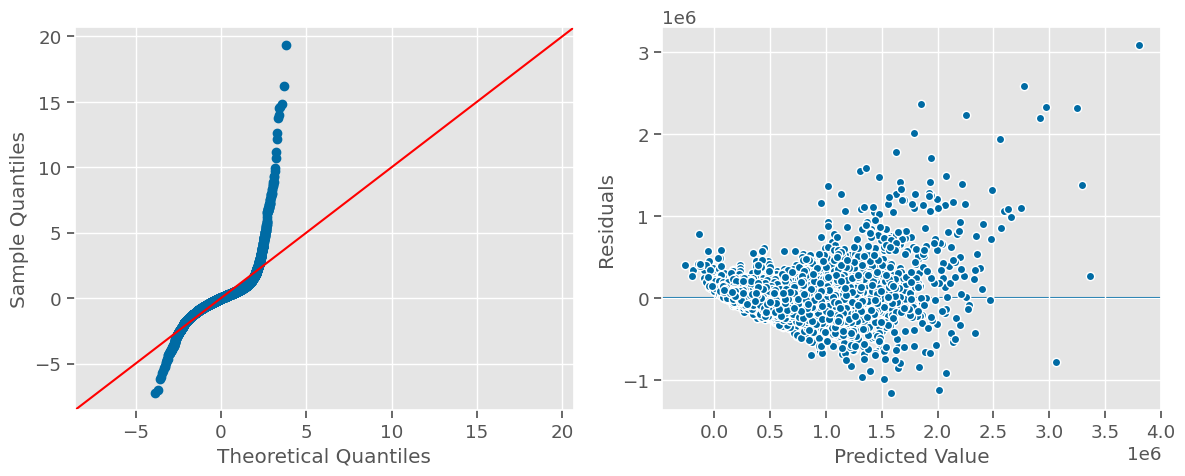

In [29]:
## instantiate an OLS model WITH the training data.
model_raw = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result_raw = model_raw.fit()
lp.evaluate_ols(result_raw,X_train_df, y_train)

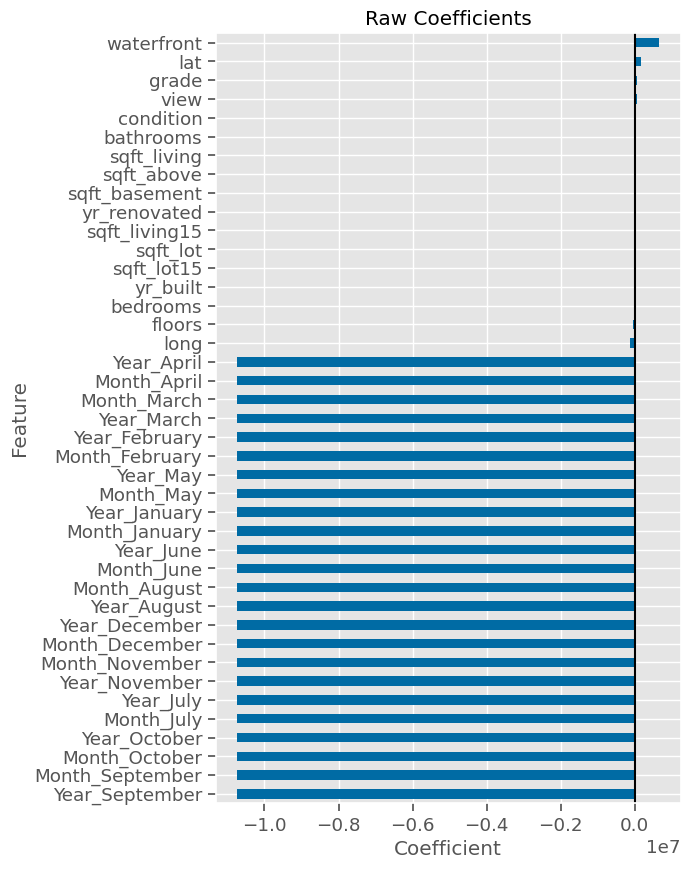

In [30]:
fig_raw = lp.plot_coeffs(result_raw, ohe_cols, include_const=True,title="Raw Coefficients")

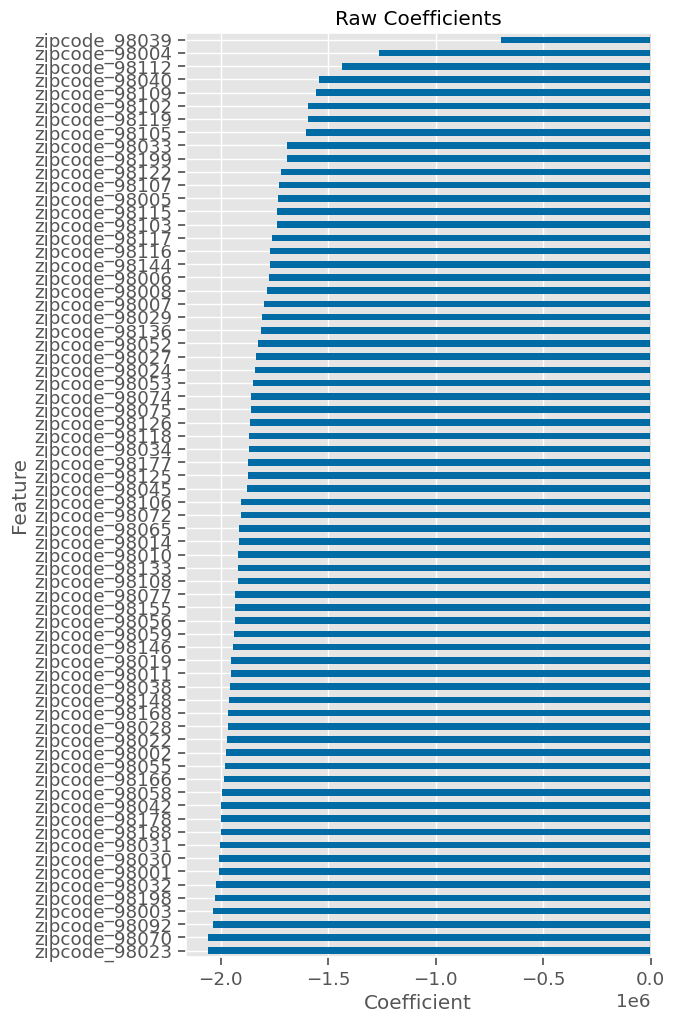

In [31]:
fig_raw_zips =lp.plot_coeffs(result_raw, nonohe_cols, figsize=(6,12),
                           include_const=True,title="Raw Coefficients")

### Raw Numeric - with Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     726.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:07:59   Log-Likelihood:            -2.1719e+05
No. Observations:               16209   AIC:                         4.346e+05
Df Residuals:                   16112   BIC:                         4.353e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms        -2.424e+04   1742.327    -13.911      0.000   -2.77e+04   -2.08e+04
bathrooms        2.398e+04   2999.909      7.995      0.000    1.81e+04    2.99e+04
sqft_living       109.1213      2.125     51.344      0.000     104.955     113.287
sqft_lot            0.2135      0.043      4.920      0.000       0.128       0.299
floors          -4.643e+04   3631.865    -12.784      0.000   -5.35e+04   -3.93e+04
waterfront       6.633e+05   1.61e+04     41.163      0.000    6.32e+05    6.95e+05
view             5.859e+04   2019.063     29.021      0.000    5.46e+04    6.26e+04
condition        2.526e+04   2217.199     11.394      0.000    2.09e+04    2.96e+04
grade            5.915e+04   2087.544     28.336      0.000    5.51e+04    6.32e+04
sqft_above         92.8398      2.182     42.549      0.000      88.563      97.117
sqft_basement      16.2811      2.503      6.506      0.000      11.376      21.186
yr_built         -624.8143     74.738     -8.360      0.000    -771.309    -478.320
yr_renovated       16.1373      3.373      4.785      0.000       9.527      22.748
lat              1.637e+05   7.28e+04      2.250      0.024    2.11e+04    3.06e+05
long            -1.346e+05   5.17e+04     -2.606      0.009   -2.36e+05   -3.34e+04
sqft_living15      11.5423      3.339      3.457      0.001       4.998      18.087
sqft_lot15         -0.0766      0.068     -1.135      0.256      -0.209       0.056
zipcode_98001   -4.483e+05   8.21e+04     -5.459      0.000   -6.09e+05   -2.87e+05
zipcode_98002   -4.182e+05   7.98e+04     -5.239      0.000   -5.75e+05   -2.62e+05
zipcode_98003   -4.751e+05   8.43e+04     -5.633      0.000    -6.4e+05    -3.1e+05
zipcode_98004    2.974e+05   8.72e+04      3.412      0.001    1.27e+05    4.68e+05
zipcode_98005   -1.754e+05   8.59e+04     -2.041      0.041   -3.44e+05   -6988.176
zipcode_98006   -2.172e+05   8.25e+04     -2.633      0.008   -3.79e+05   -5.55e+04
zipcode_98007   -2.371e+05   8.51e+04     -2.787      0.005   -4.04e+05   -7.04e+04
zipcode_98008   -2.259e+05   8.33e+04     -2.710      0.007   -3.89e+05   -6.25e+04
zipcode_98010   -3.585e+05   7.14e+04     -5.021      0.000   -4.98e+05   -2.19e+05
zipcode_98011   -3.935e+05   9.25e+04     -4.251      0.000   -5.75e+05   -2.12e+05
zipcode_98014   -3.576e+05   7.62e+04     -4.690      0.000   -5.07e+05   -2.08e+05
zipcode_98019   -3.908e+05   8.23e+04     -4.751      0.000   -5.52e+05    -2.3e+05
zipcode_98022   -4.121e+05   6.77e+04     -6.084      0.000   -5.45e+05   -2.79e+05
zipcode_98023   -5.004e+05   8.66e+04     -5.778      0.000    -6.7e+05   -3.31e+05
zipcode_98024   -2.826e+05   7.48e+04     -3.776      0.000   -4.29e+05   -1.36e+05
zipcode_98027   -2.772e+05   7.69e+04     -3.605      0.000   -4.28e+05   -1.26e+05
zipcode_98028   -4.054e+05   9.42e+04     -4.303      0.000

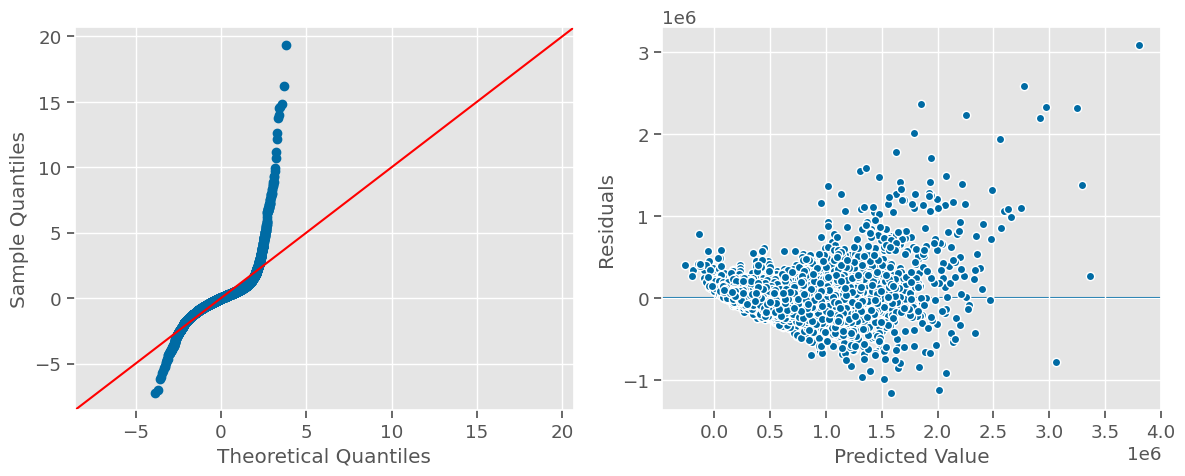

In [32]:
## instantiate an OLS model WITH the training data.
model_raw_cnst = sm.OLS(y_train, X_train_df_cnst)

## Fit the model and view the summary
result_raw_cnst = model_raw_cnst.fit()
lp.evaluate_ols(result_raw_cnst,X_train_df_cnst, y_train)

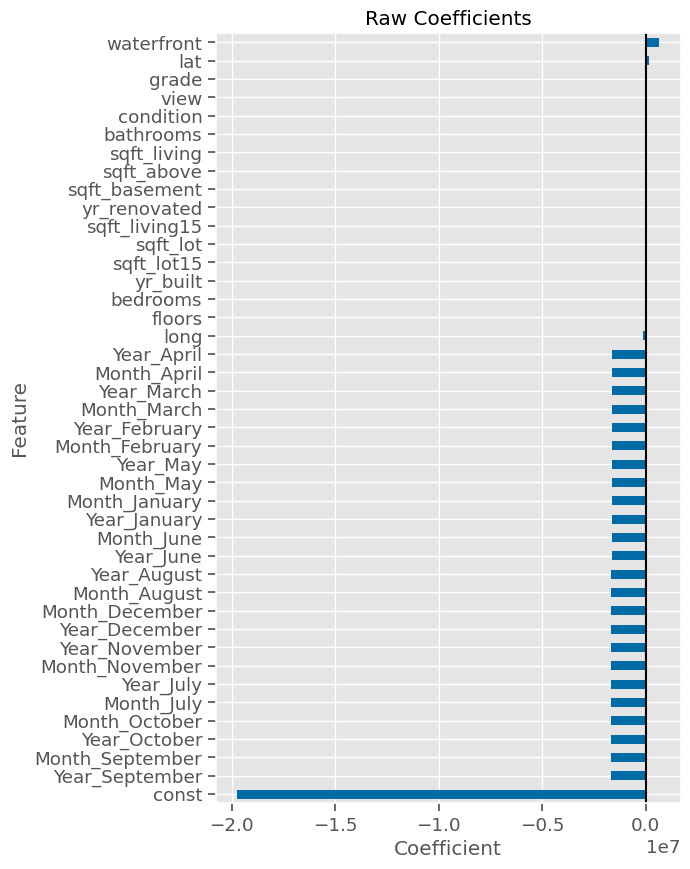

In [33]:
fig_raw =lp.plot_coeffs(result_raw_cnst, ohe_cols, include_const=True,title="Raw Coefficients")

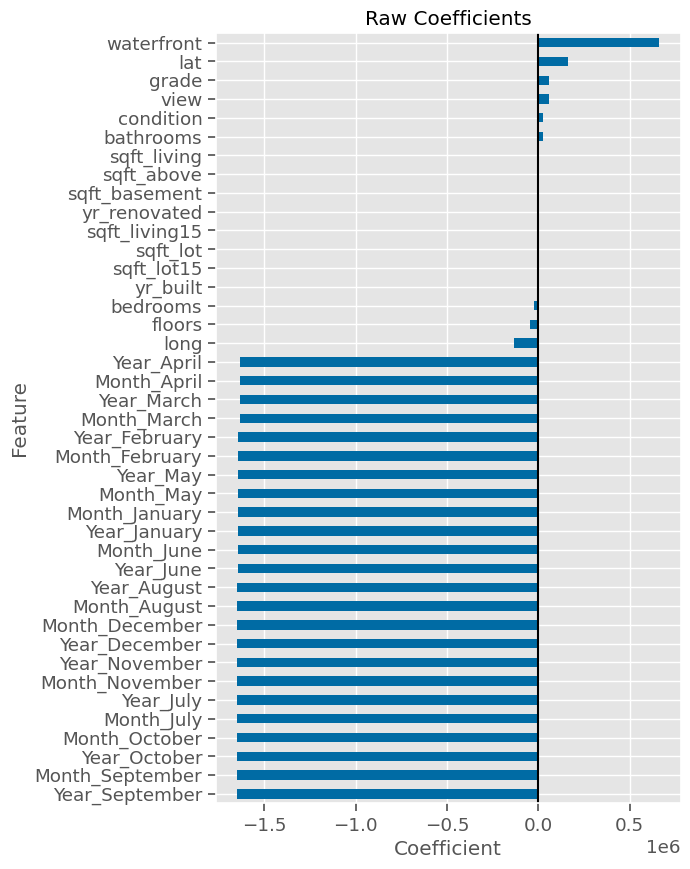

In [34]:
fig_raw =lp.plot_coeffs(result_raw_cnst, ohe_cols, include_const=False,title="Raw Coefficients")

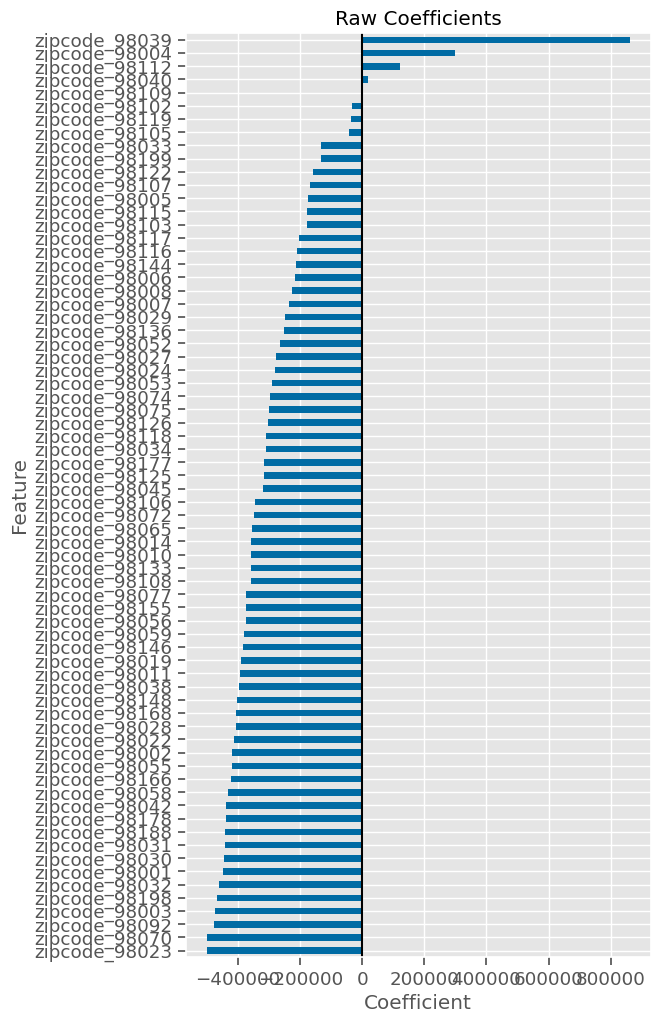

In [35]:
fig_raw_zips =lp.plot_coeffs(result_raw_cnst, nonohe_cols, figsize=(6,12),include_const=False,title="Raw Coefficients")

### Scaled Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     726.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:08:01   Log-Likelihood:            -2.1719e+05
No. Observations:               16209   AIC:                         4.346e+05
Df Residuals:                   16112   BIC:                         4.353e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms        -2.275e+04   1635.161    -13.911      0.000    -2.6e+04   -1.95e+04
bathrooms        1.851e+04   2315.515      7.995      0.000     1.4e+04    2.31e+04
sqft_living      8.695e+04   1505.689     57.751      0.000     8.4e+04    8.99e+04
sqft_lot         8994.7335   1828.379      4.920      0.000    5410.908    1.26e+04
floors          -2.513e+04   1966.054    -12.784      0.000    -2.9e+04   -2.13e+04
waterfront       5.802e+04   1409.642     41.163      0.000    5.53e+04    6.08e+04
view             4.506e+04   1552.682     29.021      0.000     4.2e+04    4.81e+04
condition        1.653e+04   1450.996     11.394      0.000    1.37e+04    1.94e+04
grade            6.969e+04   2459.399     28.336      0.000    6.49e+04    7.45e+04
sqft_above       8.895e+04   1631.549     54.516      0.000    8.57e+04    9.21e+04
sqft_basement    1.348e+04   1467.293      9.189      0.000    1.06e+04    1.64e+04
yr_built        -1.843e+04   2204.143     -8.360      0.000   -2.27e+04   -1.41e+04
yr_renovated     6525.8921   1363.837      4.785      0.000    3852.621    9199.163
lat              2.274e+04   1.01e+04      2.250      0.024    2927.003    4.26e+04
long              -1.9e+04   7291.084     -2.606      0.009   -3.33e+04   -4706.912
sqft_living15    7931.6193   2294.269      3.457      0.001    3434.596    1.24e+04
sqft_lot15      -2146.7037   1891.686     -1.135      0.256   -5854.619    1561.212
zipcode_98001   -1.222e+05   2.07e+04     -5.899      0.000   -1.63e+05   -8.16e+04
zipcode_98002   -9.209e+04    2.2e+04     -4.186      0.000   -1.35e+05    -4.9e+04
zipcode_98003    -1.49e+05   2.16e+04     -6.887      0.000   -1.91e+05   -1.07e+05
zipcode_98004    6.235e+05   1.13e+04     55.333      0.000    6.01e+05    6.46e+05
zipcode_98005    1.507e+05   1.53e+04      9.833      0.000    1.21e+05    1.81e+05
zipcode_98006    1.089e+05   9272.273     11.749      0.000    9.08e+04    1.27e+05
zipcode_98007      8.9e+04   1.65e+04      5.382      0.000    5.66e+04    1.21e+05
zipcode_98008    1.002e+05   1.32e+04      7.574      0.000    7.43e+04    1.26e+05
zipcode_98010   -3.238e+04   2.58e+04     -1.255      0.210   -8.29e+04    1.82e+04
zipcode_98011   -6.735e+04   1.98e+04     -3.408      0.001   -1.06e+05   -2.86e+04
zipcode_98014   -3.147e+04   2.66e+04     -1.184      0.236   -8.36e+04    2.06e+04
zipcode_98019   -6.473e+04   2.35e+04     -2.759      0.006   -1.11e+05   -1.87e+04
zipcode_98022   -8.597e+04   2.93e+04     -2.936      0.003   -1.43e+05   -2.86e+04
zipcode_98023   -1.743e+05   2.17e+04     -8.018      0.000   -2.17e+05   -1.32e+05
zipcode_98024    4.352e+04   2.55e+04      1.706      0.088   -6477.131    9.35e+04
zipcode_98027    4.891e+04   1.27e+04      3.843      0.000     2.4e+04    7.39e+04
zipcode_98028   -7.927e+04   1.84e+04     -4.312      0.000

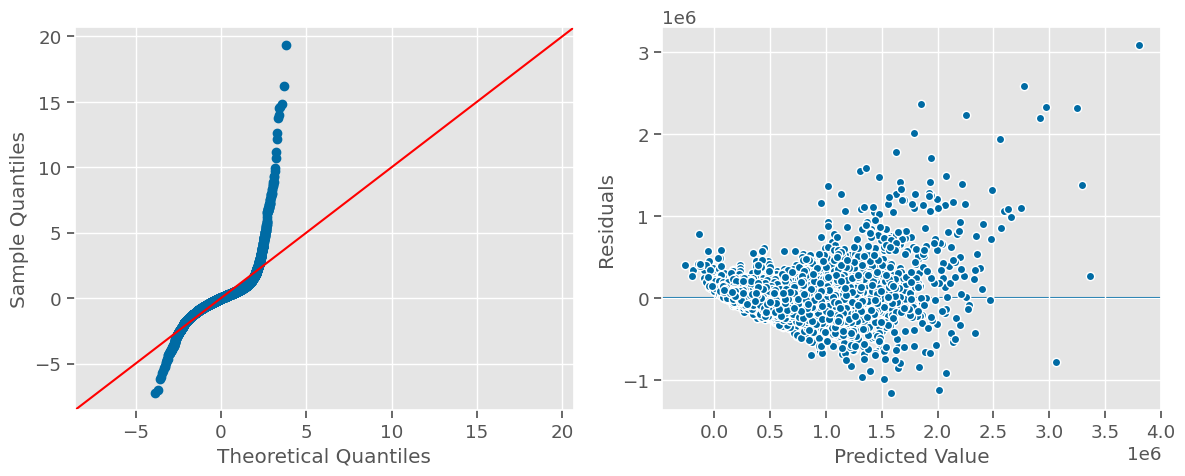

In [36]:
## instantiate an OLS model WITH the training data.
model_scaled = sm.OLS(y_train, X_train_scaled_df)

## Fit the model and view the summary
result_scaled = model_scaled.fit()
lp.evaluate_ols(result_scaled,X_train_scaled_df, y_train)

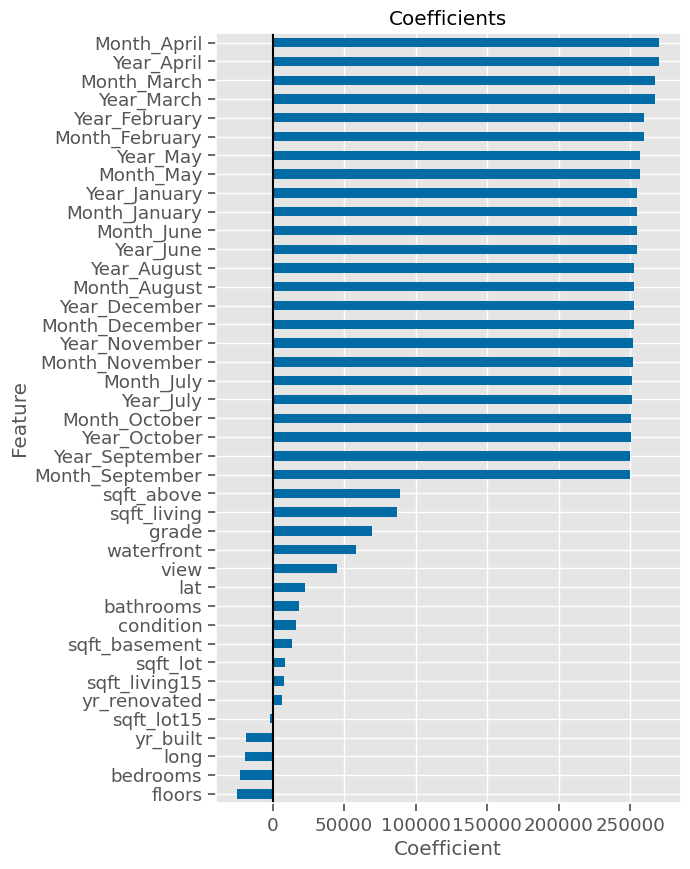

In [37]:
fig_scaled =lp.plot_coeffs(result_scaled,ohe_cols,include_const=True)

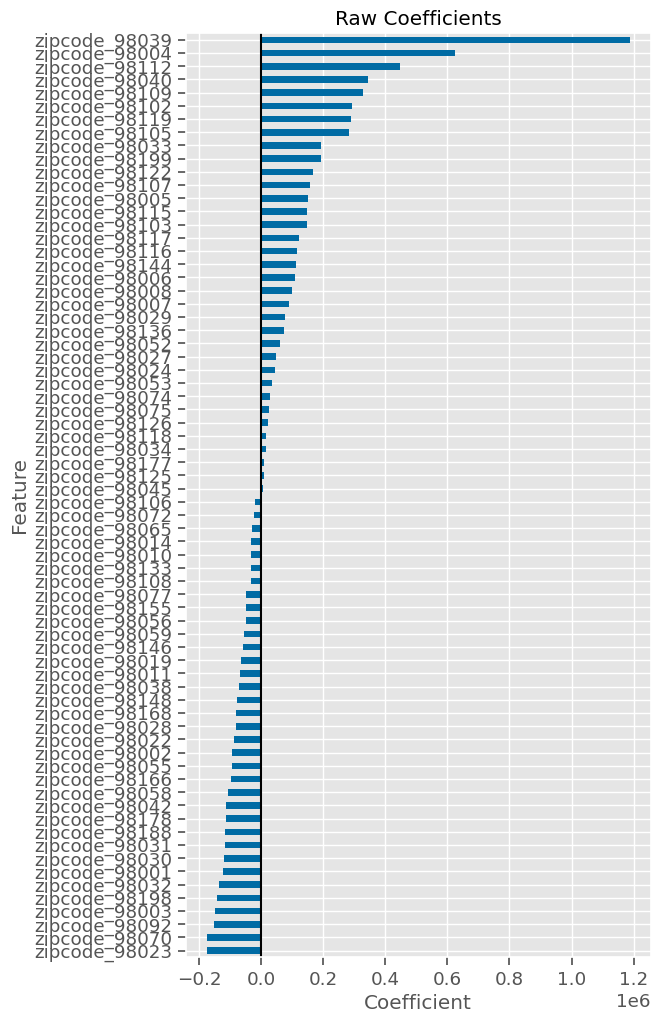

In [38]:
fig_scaled_zips =lp.plot_coeffs(result_scaled, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

### Scaled Numeric - with Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     726.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:08:02   Log-Likelihood:            -2.1719e+05
No. Observations:               16209   AIC:                         4.346e+05
Df Residuals:                   16112   BIC:                         4.353e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms        -2.275e+04   1635.161    -13.911      0.000    -2.6e+04   -1.95e+04
bathrooms        1.851e+04   2315.515      7.995      0.000     1.4e+04    2.31e+04
sqft_living      8.695e+04   1505.689     57.751      0.000     8.4e+04    8.99e+04
sqft_lot         8994.7335   1828.379      4.920      0.000    5410.908    1.26e+04
floors          -2.513e+04   1966.054    -12.784      0.000    -2.9e+04   -2.13e+04
waterfront       5.802e+04   1409.642     41.163      0.000    5.53e+04    6.08e+04
view             4.506e+04   1552.682     29.021      0.000     4.2e+04    4.81e+04
condition        1.653e+04   1450.996     11.394      0.000    1.37e+04    1.94e+04
grade            6.969e+04   2459.399     28.336      0.000    6.49e+04    7.45e+04
sqft_above       8.895e+04   1631.549     54.516      0.000    8.57e+04    9.21e+04
sqft_basement    1.348e+04   1467.293      9.189      0.000    1.06e+04    1.64e+04
yr_built        -1.843e+04   2204.143     -8.360      0.000   -2.27e+04   -1.41e+04
yr_renovated     6525.8921   1363.837      4.785      0.000    3852.621    9199.163
lat              2.274e+04   1.01e+04      2.250      0.024    2927.003    4.26e+04
long              -1.9e+04   7291.084     -2.606      0.009   -3.33e+04   -4706.912
sqft_living15    7931.6193   2294.269      3.457      0.001    3434.596    1.24e+04
sqft_lot15      -2146.7037   1891.686     -1.135      0.256   -5854.619    1561.212
zipcode_98001   -1.594e+05   2.07e+04     -7.701      0.000      -2e+05   -1.19e+05
zipcode_98002   -1.292e+05    2.2e+04     -5.881      0.000   -1.72e+05   -8.62e+04
zipcode_98003   -1.861e+05   2.16e+04     -8.613      0.000   -2.28e+05   -1.44e+05
zipcode_98004    5.863e+05   1.13e+04     51.962      0.000    5.64e+05    6.08e+05
zipcode_98005    1.135e+05   1.53e+04      7.407      0.000    8.35e+04    1.44e+05
zipcode_98006    7.179e+04   9278.643      7.737      0.000    5.36e+04       9e+04
zipcode_98007    5.186e+04   1.65e+04      3.136      0.002    1.94e+04    8.43e+04
zipcode_98008    6.304e+04   1.32e+04      4.763      0.000    3.71e+04     8.9e+04
zipcode_98010   -6.952e+04   2.58e+04     -2.698      0.007    -1.2e+05    -1.9e+04
zipcode_98011   -1.045e+05   1.98e+04     -5.282      0.000   -1.43e+05   -6.57e+04
zipcode_98014   -6.862e+04   2.66e+04     -2.582      0.010   -1.21e+05   -1.65e+04
zipcode_98019   -1.019e+05   2.35e+04     -4.340      0.000   -1.48e+05   -5.59e+04
zipcode_98022   -1.231e+05   2.92e+04     -4.210      0.000    -1.8e+05   -6.58e+04
zipcode_98023   -2.114e+05   2.17e+04     -9.736      0.000   -2.54e+05   -1.69e+05
zipcode_98024    6372.3392   2.55e+04      0.250      0.803   -4.36e+04    5.63e+04
zipcode_98027    1.176e+04   1.27e+04      0.925      0.355   -1.32e+04    3.67e+04
zipcode_98028   -1.164e+05   1.84e+04     -6.324      0.000

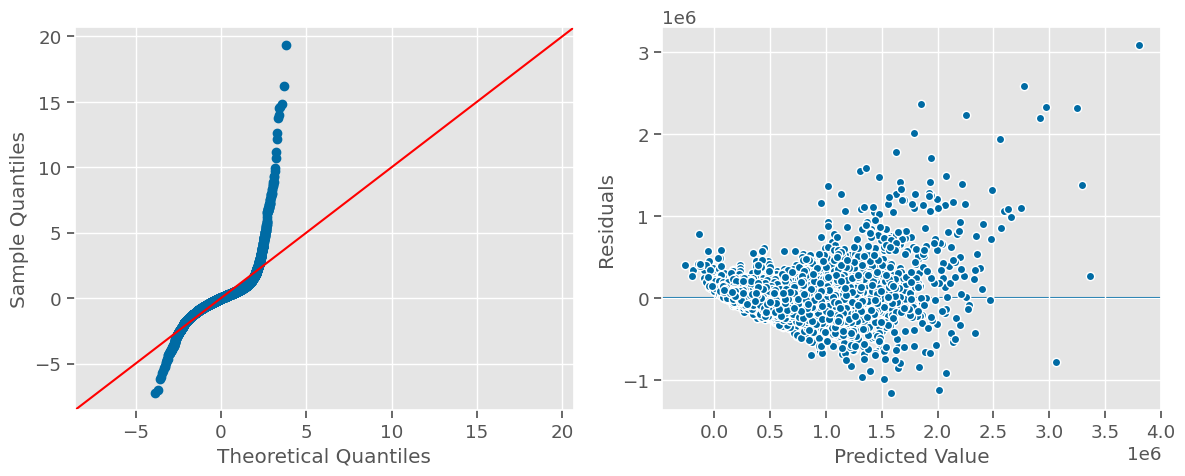

In [39]:
## instantiate an OLS model WITH the training data.
model_scaled_cnst = sm.OLS(y_train, X_train_scaled_df_cnst)

## Fit the model and view the summary
result_scaled_cnst = model_scaled_cnst.fit()
lp.evaluate_ols(result_scaled_cnst,X_train_scaled_df_cnst, y_train)

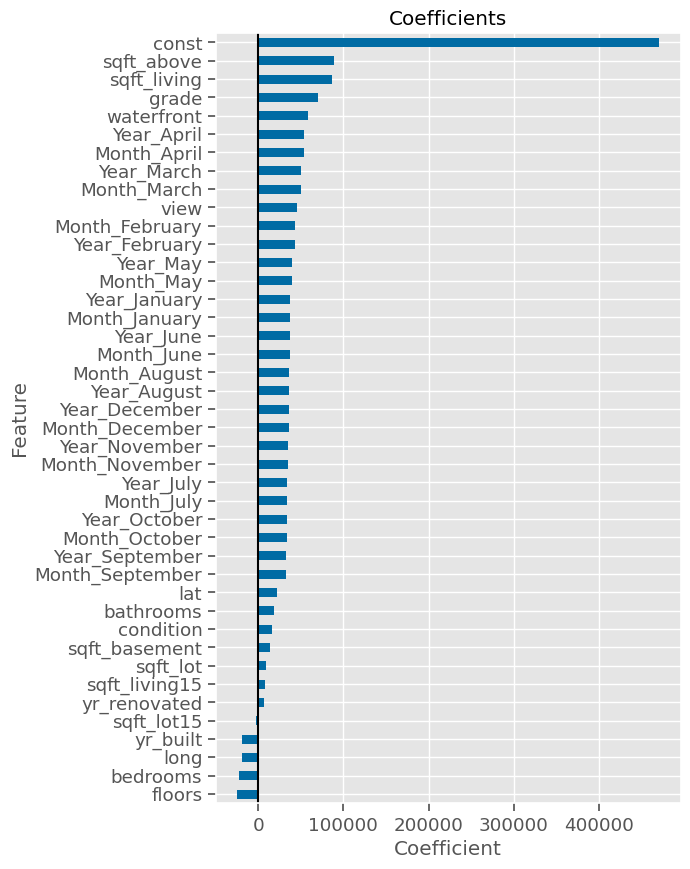

In [40]:
fig_scaled =lp.plot_coeffs(result_scaled_cnst,ohe_cols,include_const=True)

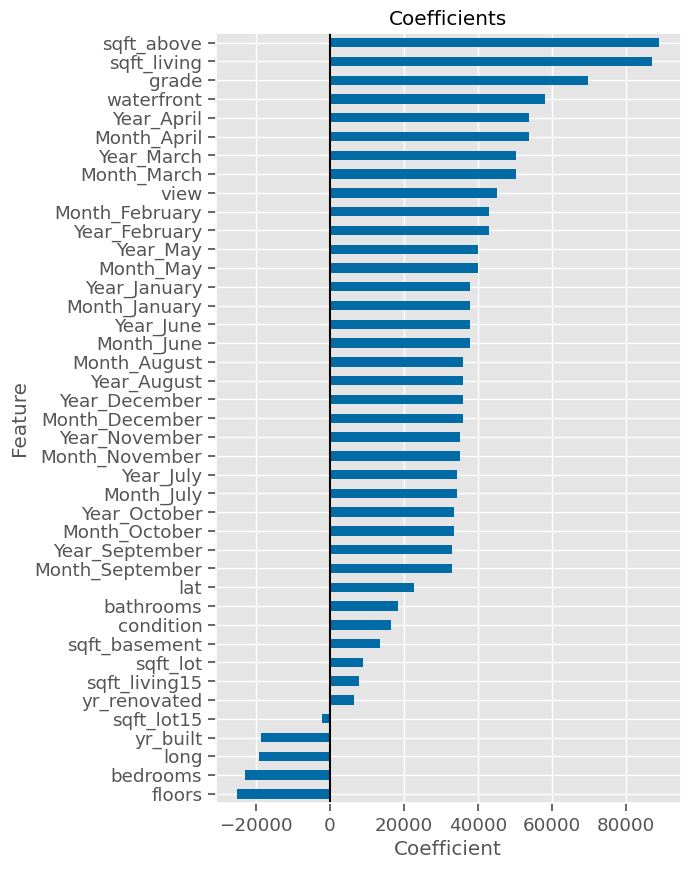

In [41]:
fig_scaled =lp.plot_coeffs(result_scaled_cnst,ohe_cols,include_const=False)

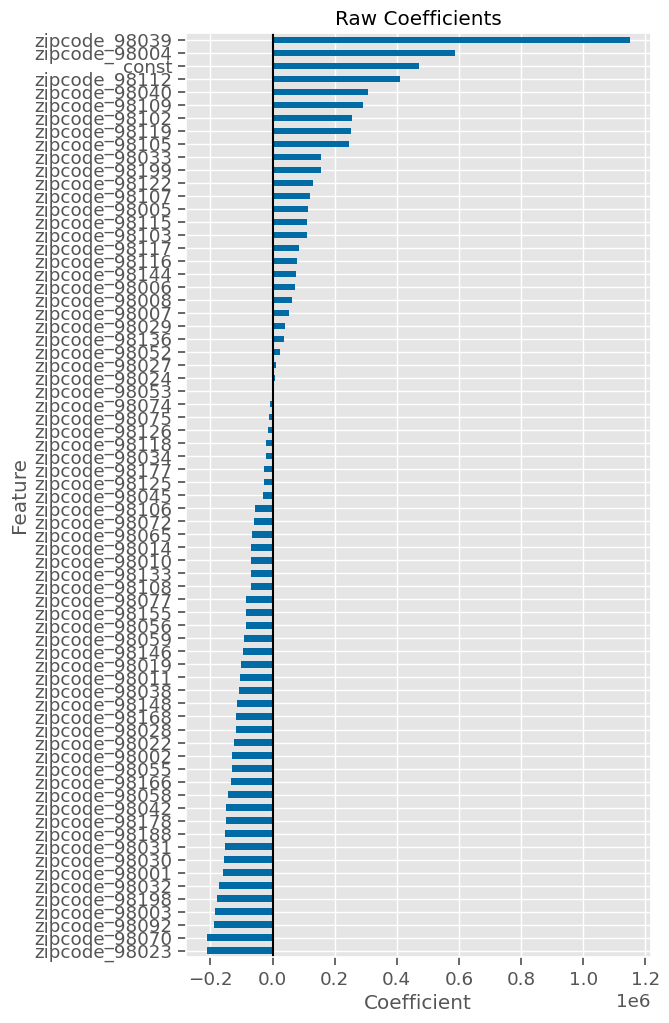

In [42]:
fig_scaled_zips =lp.plot_coeffs(result_scaled_cnst, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

## Modeling - No Outliers

### Raw Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     750.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:08:04   Log-Likelihood:            -1.8054e+05
No. Observations:               14026   AIC:                         3.613e+05
Df Residuals:                   13931   BIC:                         3.620e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms        -5324.2438   1254.631     -4.244      0.000   -7783.488   -2864.999
bathrooms        1.624e+04   2067.181      7.858      0.000    1.22e+04    2.03e+04
sqft_living        72.2130      1.572     45.936      0.000      69.132      75.294
sqft_lot            1.1261      0.121      9.320      0.000       0.889       1.363
floors          -2.435e+04   2399.258    -10.150      0.000   -2.91e+04   -1.96e+04
waterfront       2.589e-05   8.27e-06      3.131      0.002    9.68e-06    4.21e-05
view             3.608e+04   2132.433     16.918      0.000    3.19e+04    4.03e+04
condition        2.565e+04   1433.316     17.894      0.000    2.28e+04    2.85e+04
grade            4.897e+04   1412.501     34.669      0.000    4.62e+04    5.17e+04
sqft_above         66.4235      1.557     42.665      0.000      63.372      69.475
sqft_basement       5.7898      1.782      3.249      0.001       2.297       9.282
yr_built         -489.9469     49.437     -9.910      0.000    -586.850    -393.043
yr_renovated     8.253e-07   2.63e-07      3.133      0.002    3.09e-07    1.34e-06
lat              1.206e+05    4.9e+04      2.462      0.014    2.46e+04    2.17e+05
long            -1.086e+05   4.64e+04     -2.340      0.019      -2e+05   -1.76e+04
sqft_living15      23.5801      2.392      9.857      0.000      18.891      28.269
sqft_lot15         -0.7766      0.166     -4.678      0.000      -1.102      -0.451
zipcode_98001   -1.612e+06   4.61e+05     -3.499      0.000   -2.52e+06   -7.09e+05
zipcode_98002   -1.596e+06   4.58e+05     -3.484      0.000   -2.49e+06   -6.98e+05
zipcode_98003   -1.621e+06   4.62e+05     -3.505      0.000   -2.53e+06   -7.14e+05
zipcode_98004   -1.037e+06   4.62e+05     -2.245      0.025   -1.94e+06   -1.32e+05
zipcode_98005   -1.311e+06    4.6e+05     -2.849      0.004   -2.21e+06   -4.09e+05
zipcode_98006    -1.37e+06   4.59e+05     -2.986      0.003   -2.27e+06   -4.71e+05
zipcode_98007   -1.391e+06   4.59e+05     -3.031      0.002   -2.29e+06   -4.91e+05
zipcode_98008   -1.394e+06   4.58e+05     -3.045      0.002   -2.29e+06   -4.97e+05
zipcode_98010   -1.501e+06    4.5e+05     -3.334      0.001   -2.38e+06   -6.19e+05
zipcode_98011   -1.514e+06   4.63e+05     -3.267      0.001   -2.42e+06   -6.06e+05
zipcode_98014   -1.498e+06   4.51e+05     -3.325      0.001   -2.38e+06   -6.15e+05
zipcode_98019   -1.538e+06   4.53e+05     -3.392      0.001   -2.43e+06   -6.49e+05
zipcode_98022   -1.565e+06   4.48e+05     -3.496      0.000   -2.44e+06   -6.88e+05
zipcode_98023   -1.645e+06   4.65e+05     -3.539      0.000   -2.56e+06   -7.34e+05
zipcode_98024   -1.458e+06   4.49e+05     -3.250      0.001   -2.34e+06   -5.79e+05
zipcode_98027   -1.415e+06   4.54e+05     -3.118      0.002   -2.31e+06   -5.26e+05
zipcode_98028   -1.533e+06   4.65e+05     -3.295      0.001

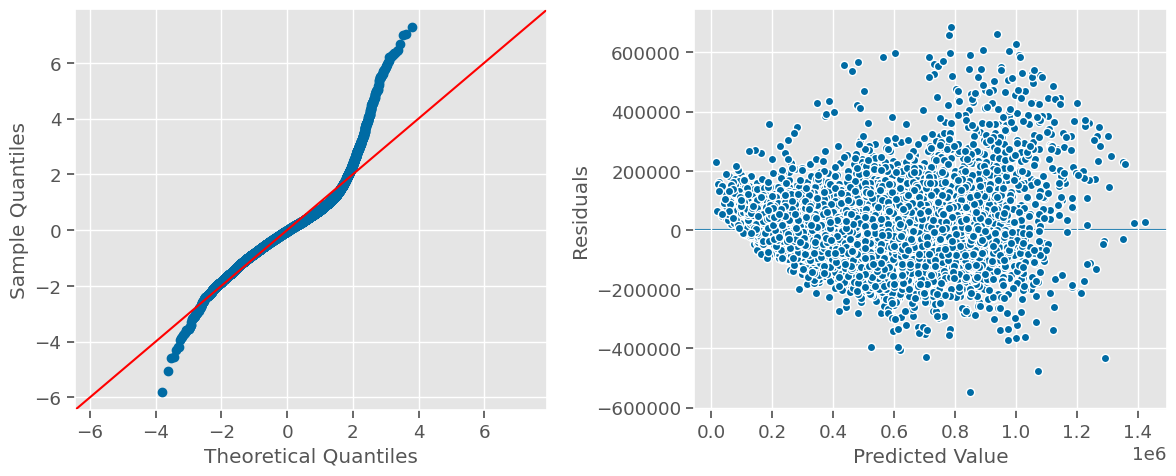

In [43]:
## instantiate an OLS model WITH the training data.
model_cln = sm.OLS(y_train_cln, X_train_df_cln)

## Fit the model and view the summary
result_cln = model_cln.fit()
lp.evaluate_ols(result_cln,X_train_df_cln, y_train_cln)

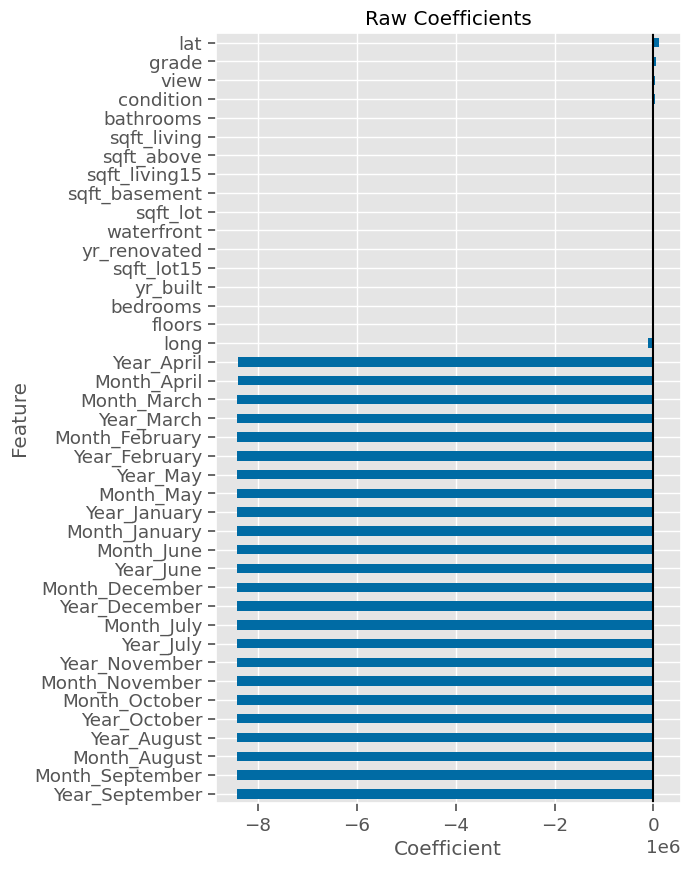

In [44]:
fig_raw =lp.plot_coeffs(result_cln, ohe_cols, include_const=True,title="Raw Coefficients")

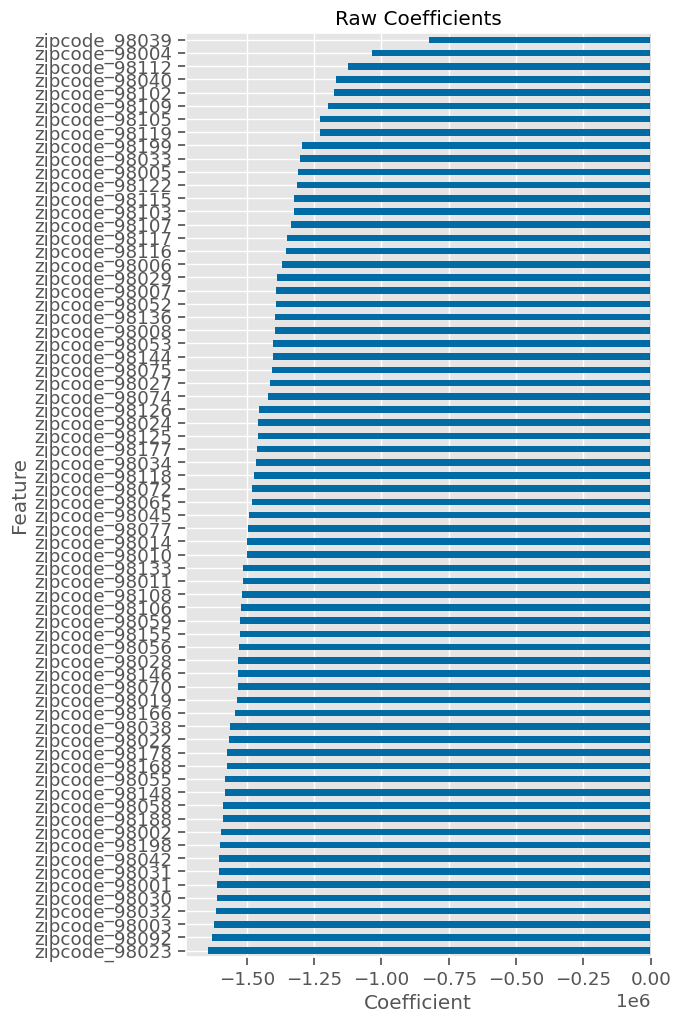

In [45]:
fig_raw_zips =lp.plot_coeffs(result_cln, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

### Raw Numeric - with Constant

In [46]:
X_train_df_cln_cnst.describe()

bedrooms     bathrooms   sqft_living       sqft_lot        floors  \
count  14026.000000  14026.000000  14026.000000   14026.000000  14026.000000   
mean       3.322829      2.038001   1951.864894    9817.669614      1.481998   
std        0.848706      0.691919    740.005605   11416.579410      0.538447   
min        1.000000      0.500000    370.000000     520.000000      1.000000   
25%        3.000000      1.500000   1400.000000    5000.000000      1.000000   
50%        3.000000      2.000000   1840.000000    7375.000000      1.000000   
75%        4.000000      2.500000   2410.000000    9900.000000      2.000000   
max        6.000000      4.250000   4750.000000  137214.000000      3.000000   

       waterfront          view     condition         grade    sqft_above  \
count     14026.0  14026.000000  14026.000000  14026.000000  14026.000000   
mean          0.0      0.089405      3.422715      7.535078   1697.819549   
std           0.0      0.395508      0.648856      1.028411    711.184980   
min           0.0      0.000000      2.000000      5.000000    370.000000   
25%           0.0      0.000000      3.000000      7.000000   1170.000000   
50%           0.0      0.000000      3.000000      7.000000   1509.500000   
75%           0.0      0.000000      4.000000      8.000000   2100.000000   
max           0.0      2.000000      5.000000     11.000000   4270.000000   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   14026.000000  14026.000000       14026.0  14026.000000  14026.000000   
mean      254.045344   1971.727292           0.0     47.560516   -122.220398   
std       387.164969     28.993672           0.0      0.140097      0.128678   
min         0.000000   1900.000000           0.0     47.176400   -122.502000   
25%         0.000000   1953.000000           0.0     47.468300   -122.329000   
50%         0.000000   1975.000000           0.0     47.571800   -122.235000   
75%       500.000000   1997.000000           0.0     47.681100   -122.134000   
max      1610.000000   2015.000000           0.0     47.777600   -121.797000   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   14026.000000  14026.000000   14026.000000   14026.000000   
mean     1913.074433   9029.714245       0.017396       0.010409   
std       600.621487   8785.328471       0.130747       0.101497   
min       460.000000    660.000000       0.000000       0.000000   
25%      1470.000000   5000.000000       0.000000       0.000000   
50%      1800.000000   7438.500000       0.000000       0.000000   
75%      2260.000000   9600.000000       0.000000       0.000000   
max      4040.000000  93393.000000       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.014758       0.011621       0.008056       0.020533   
std         0.120588       0.107178       0.089399       0.141821   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.007130       0.013404       0.003993       0.009411   
std         0.084139       0.115000       0.063063       0.096557   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_980

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     750.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:08:05   Log-Likelihood:            -1.8054e+05
No. Observations:               14026   AIC:                         3.613e+05
Df Residuals:                   13931   BIC:                         3.620e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms        -5324.2438   1254.631     -4.244      0.000   -7783.488   -2864.999
bathrooms        1.624e+04   2067.181      7.858      0.000    1.22e+04    2.03e+04
sqft_living        72.2131      1.572     45.936      0.000      69.132      75.294
sqft_lot            1.1261      0.121      9.320      0.000       0.889       1.363
floors          -2.435e+04   2399.258    -10.150      0.000   -2.91e+04   -1.96e+04
waterfront      -1.139e-05   3.64e-06     -3.129      0.002   -1.85e-05   -4.26e-06
view             3.608e+04   2132.433     16.918      0.000    3.19e+04    4.03e+04
condition        2.565e+04   1433.316     17.894      0.000    2.28e+04    2.85e+04
grade            4.897e+04   1412.501     34.669      0.000    4.62e+04    5.17e+04
sqft_above         66.4234      1.557     42.665      0.000      63.372      69.475
sqft_basement       5.7897      1.782      3.249      0.001       2.297       9.282
yr_built         -489.9469     49.437     -9.910      0.000    -586.850    -393.043
yr_renovated    -3.073e-07   9.83e-08     -3.126      0.002      -5e-07   -1.15e-07
lat              1.206e+05    4.9e+04      2.462      0.014    2.46e+04    2.17e+05
long            -1.086e+05   4.64e+04     -2.340      0.019      -2e+05   -1.76e+04
sqft_living15      23.5801      2.392      9.857      0.000      18.891      28.269
sqft_lot15         -0.7766      0.166     -4.678      0.000      -1.102      -0.451
zipcode_98001   -3.893e+05   7.14e+04     -5.450      0.000   -5.29e+05   -2.49e+05
zipcode_98002   -3.734e+05   6.89e+04     -5.419      0.000   -5.08e+05   -2.38e+05
zipcode_98003   -3.979e+05   7.32e+04     -5.439      0.000   -5.41e+05   -2.54e+05
zipcode_98004    1.863e+05   7.15e+04      2.605      0.009    4.61e+04    3.26e+05
zipcode_98005   -8.827e+04   7.02e+04     -1.257      0.209   -2.26e+05    4.94e+04
zipcode_98006   -1.467e+05   6.83e+04     -2.148      0.032   -2.81e+05   -1.28e+04
zipcode_98007   -1.681e+05   6.91e+04     -2.433      0.015   -3.04e+05   -3.27e+04
zipcode_98008   -1.715e+05   6.78e+04     -2.528      0.011   -3.05e+05   -3.86e+04
zipcode_98010   -2.778e+05    6.1e+04     -4.553      0.000   -3.97e+05   -1.58e+05
zipcode_98011   -2.914e+05   7.39e+04     -3.945      0.000   -4.36e+05   -1.47e+05
zipcode_98014   -2.754e+05   6.23e+04     -4.420      0.000   -3.98e+05   -1.53e+05
zipcode_98019   -3.152e+05   6.46e+04     -4.883      0.000   -4.42e+05   -1.89e+05
zipcode_98022   -3.426e+05    5.9e+04     -5.807      0.000   -4.58e+05   -2.27e+05
zipcode_98023   -4.219e+05   7.55e+04     -5.590      0.000    -5.7e+05   -2.74e+05
zipcode_98024   -2.353e+05   6.03e+04     -3.905      0.000   -3.53e+05   -1.17e+05
zipcode_98027   -1.926e+05   6.37e+04     -3.026      0.002   -3.17e+05   -6.78e+04
zipcode_98028   -3.105e+05   7.55e+04     -4.111      0.000

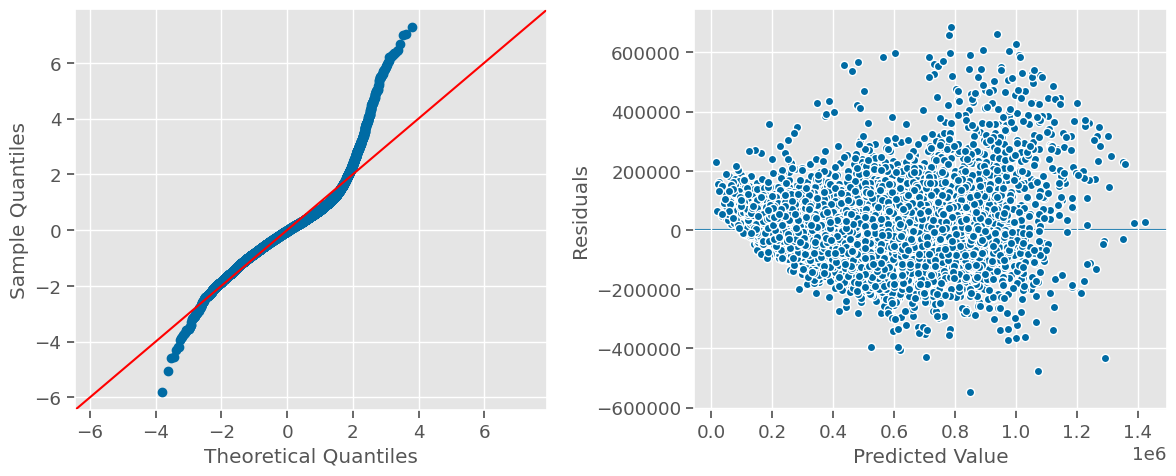

In [47]:
## instantiate an OLS model WITH the training data.
model_cln_cnst = sm.OLS(y_train_cln, X_train_df_cln_cnst)

## Fit the model and view the summary
result_cln_cnst = model_cln_cnst.fit()
lp.evaluate_ols(result_cln_cnst,X_train_df_cln_cnst, y_train_cln)

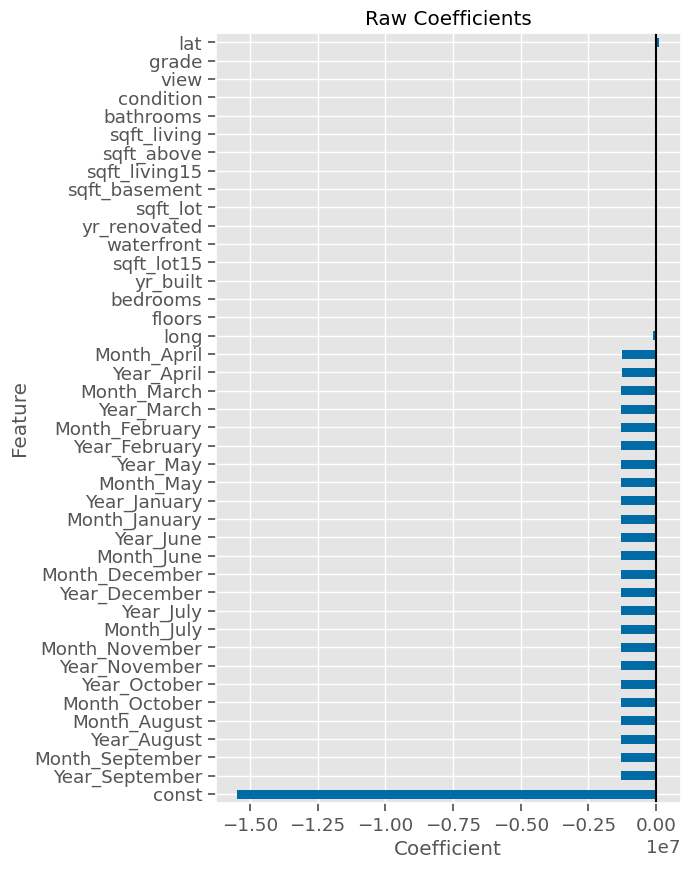

In [48]:
fig_raw =lp.plot_coeffs(result_cln_cnst, ohe_cols, include_const=True,title="Raw Coefficients")

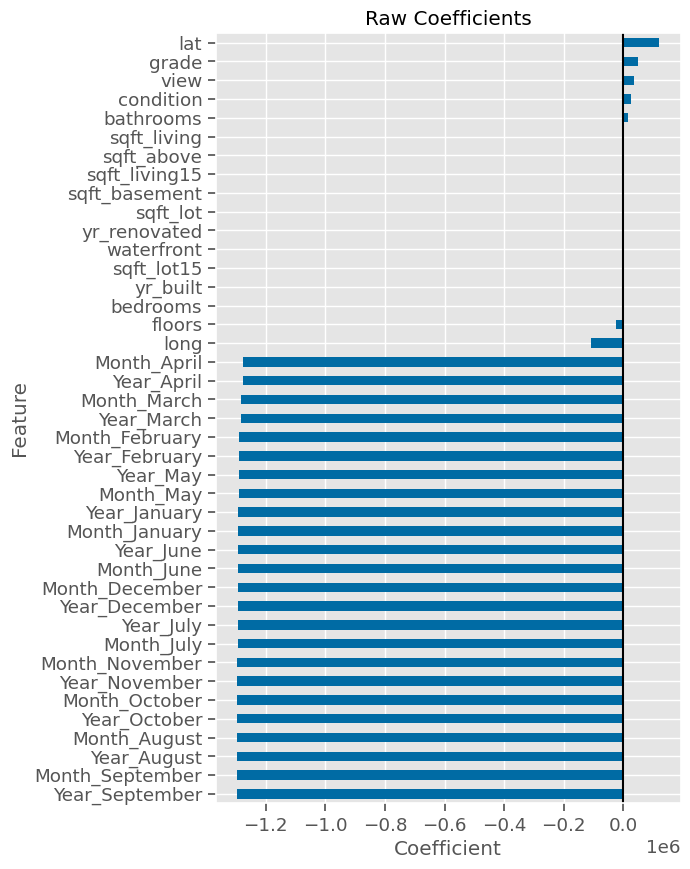

In [49]:
fig_raw =lp.plot_coeffs(result_cln_cnst, ohe_cols, include_const=False,title="Raw Coefficients")

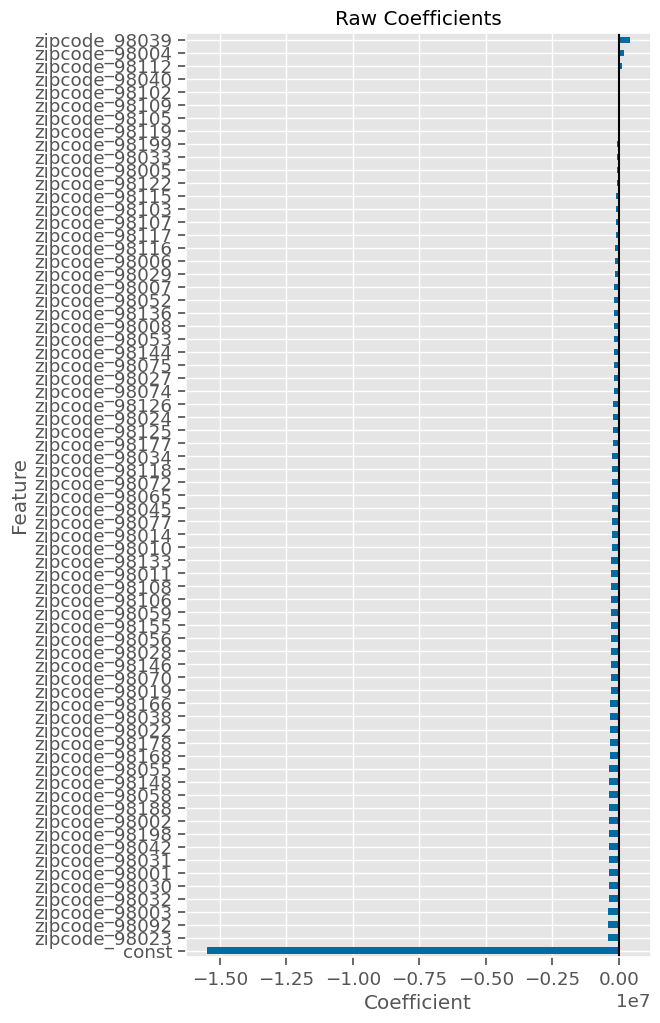

In [50]:
fig_raw_zips =lp.plot_coeffs(result_cln_cnst, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

### Scaled Numeric - No Constant

In [51]:
X_train_scaled_df_cln.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean   2.269522e-16  1.904777e-16 -1.043575e-16 -2.064353e-17 -7.193574e-17   
std    1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min   -2.737005e+00 -2.222884e+00 -2.137715e+00 -8.144297e-01 -8.951943e-01   
25%   -3.803916e-01 -7.775766e-01 -7.457843e-01 -4.220039e-01 -8.951943e-01   
50%   -3.803916e-01 -5.492292e-02 -1.511730e-01 -2.139657e-01 -8.951943e-01   
75%    7.979150e-01  6.677308e-01  6.191189e-01  7.211733e-03  9.620640e-01   
max    3.154528e+00  3.197019e+00  3.781370e+00  1.115929e+01  2.819322e+00   

       waterfront          view     condition         grade    sqft_above  \
count     14026.0  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean          0.0  2.127677e-17 -6.028418e-17  9.574546e-17  1.104366e-16   
std           0.0  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min           0.0 -2.260599e-01 -2.192729e+00 -2.465132e+00 -1.867119e+00   
25%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -7.421956e-01   
50%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -2.648063e-01   
75%           0.0 -2.260599e-01  8.897284e-01  4.520945e-01  5.655277e-01   
max           0.0  4.830905e+00  2.430957e+00  3.369321e+00  3.616882e+00   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   1.402600e+04  1.402600e+04       14026.0  1.402600e+04  1.402600e+04   
mean    8.004118e-17 -3.185436e-15           0.0  2.031273e-14 -2.339431e-14   
std     1.000036e+00  1.000036e+00           0.0  1.000036e+00  1.000036e+00   
min    -6.561916e-01 -2.473983e+00           0.0 -2.741890e+00 -2.188505e+00   
25%    -6.561916e-01 -6.459327e-01           0.0 -6.582541e-01 -8.440149e-01   
50%    -6.561916e-01  1.128806e-01           0.0  8.054811e-02 -1.134825e-01   
75%     6.352936e-01  8.716940e-01           0.0  8.607518e-01  6.714512e-01   
max     3.502391e+00  1.492541e+00           0.0  1.549587e+00  3.290488e+00   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   1.402600e+04  1.402600e+04   14026.000000   14026.000000   
mean    2.836902e-17  2.380972e-17       0.017396       0.010409   
std     1.000036e+00  1.000036e+00       0.130747       0.101497   
min    -2.419371e+00 -9.527262e-01       0.000000       0.000000   
25%    -7.377196e-01 -4.587032e-01       0.000000       0.000000   
50%    -1.882691e-01 -1.811282e-01       0.000000       0.000000   
75%     5.776316e-01  6.491574e-02       0.000000       0.000000   
max     3.541334e+00  9.603089e+00       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.014758       0.011621       0.008056       0.020533   
std         0.120588       0.107178       0.089399       0.141821   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.007130       0.013404       0.003993       0.009411   
std         0.084139       0.115000       0.063063       0.096557   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98014  zipco

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     750.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:08:06   Log-Likelihood:            -1.8054e+05
No. Observations:               14026   AIC:                         3.613e+05
Df Residuals:                   13931   BIC:                         3.620e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms        -4518.5557   1064.774     -4.244      0.000   -6605.657   -2431.455
bathrooms        1.124e+04   1430.271      7.858      0.000    8435.308     1.4e+04
sqft_living      5.031e+04    953.479     52.767      0.000    4.84e+04    5.22e+04
sqft_lot         1.286e+04   1379.432      9.320      0.000    1.02e+04    1.56e+04
floors          -1.311e+04   1291.828    -10.150      0.000   -1.56e+04   -1.06e+04
waterfront       5.751e-10   5.75e-11     10.011      0.000    4.63e-10    6.88e-10
view             1.427e+04    843.365     16.918      0.000    1.26e+04    1.59e+04
condition        1.664e+04    929.982     17.894      0.000    1.48e+04    1.85e+04
grade            5.036e+04   1452.579     34.669      0.000    4.75e+04    5.32e+04
sqft_above       5.024e+04    973.141     51.627      0.000    4.83e+04    5.21e+04
sqft_basement    3876.1885    906.183      4.277      0.000    2099.948    5652.429
yr_built         -1.42e+04   1433.314     -9.910      0.000    -1.7e+04   -1.14e+04
yr_renovated     2.141e-10    2.9e-11      7.378      0.000    1.57e-10    2.71e-10
lat              1.689e+04   6861.063      2.462      0.014    3445.645    3.03e+04
long            -1.397e+04   5971.676     -2.340      0.019   -2.57e+04   -2269.424
sqft_living15    1.416e+04   1436.795      9.857      0.000    1.13e+04     1.7e+04
sqft_lot15      -6822.1658   1458.273     -4.678      0.000   -9680.577   -3963.755
zipcode_98001   -1.289e+05    1.4e+04     -9.178      0.000   -1.56e+05   -1.01e+05
zipcode_98002   -1.131e+05   1.43e+04     -7.891      0.000   -1.41e+05    -8.5e+04
zipcode_98003   -1.375e+05   1.46e+04     -9.391      0.000   -1.66e+05   -1.09e+05
zipcode_98004    4.466e+05   8070.266     55.343      0.000    4.31e+05    4.62e+05
zipcode_98005    1.721e+05   9622.933     17.882      0.000    1.53e+05    1.91e+05
zipcode_98006    1.136e+05   6450.746     17.617      0.000    1.01e+05    1.26e+05
zipcode_98007    9.221e+04   1.05e+04      8.797      0.000    7.17e+04    1.13e+05
zipcode_98008     8.88e+04   8955.923      9.915      0.000    7.12e+04    1.06e+05
zipcode_98010   -1.744e+04   1.84e+04     -0.950      0.342   -5.34e+04    1.86e+04
zipcode_98011   -3.109e+04   1.29e+04     -2.419      0.016   -5.63e+04   -5897.135
zipcode_98014   -1.509e+04   2.09e+04     -0.721      0.471   -5.61e+04    2.59e+04
zipcode_98019   -5.488e+04   1.77e+04     -3.097      0.002   -8.96e+04   -2.01e+04
zipcode_98022   -8.226e+04   2.05e+04     -4.010      0.000   -1.22e+05   -4.21e+04
zipcode_98023   -1.615e+05   1.56e+04    -10.359      0.000   -1.92e+05   -1.31e+05
zipcode_98024    2.508e+04   2.14e+04      1.169      0.242    -1.7e+04    6.71e+04
zipcode_98027    6.771e+04   9562.654      7.081      0.000     4.9e+04    8.65e+04
zipcode_98028   -5.016e+04   1.17e+04     -4.281      0.000

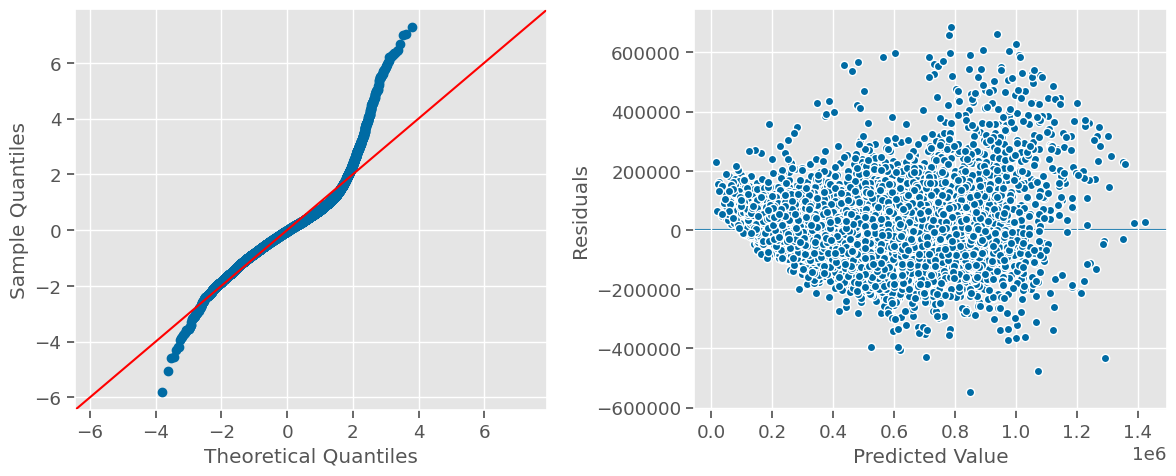

In [52]:
## instantiate an OLS model WITH the training data.
model_cln_scaled = sm.OLS(y_train_cln, X_train_scaled_df_cln)

## Fit the model and view the summary
result_cln_scaled = model_cln_scaled.fit()
lp.evaluate_ols(result_cln_scaled,X_train_scaled_df_cln, y_train_cln)

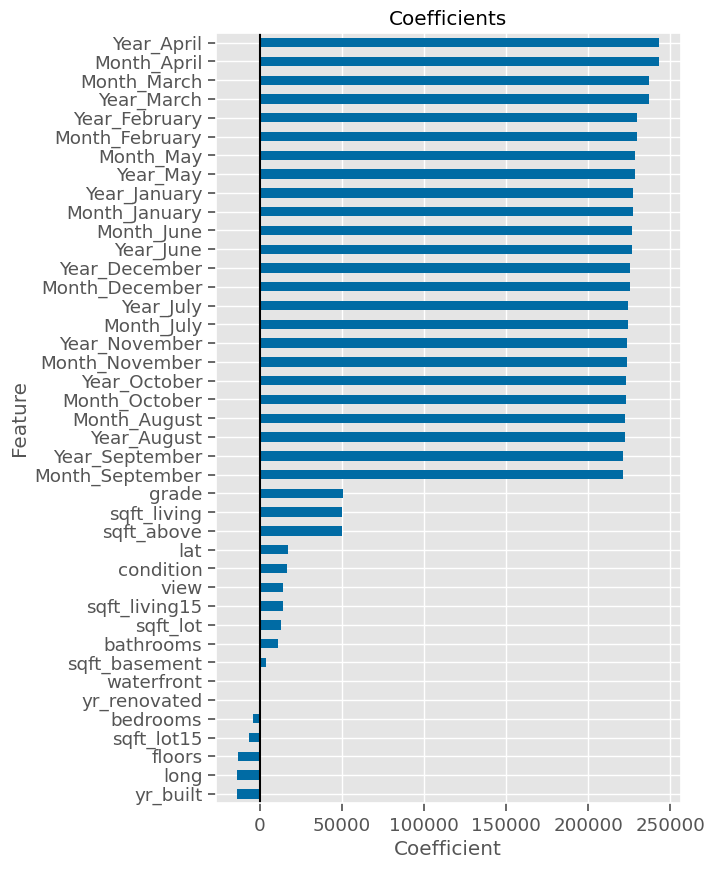

In [53]:
fig_scaled =lp.plot_coeffs(result_cln_scaled,ohe_cols,include_const=True)

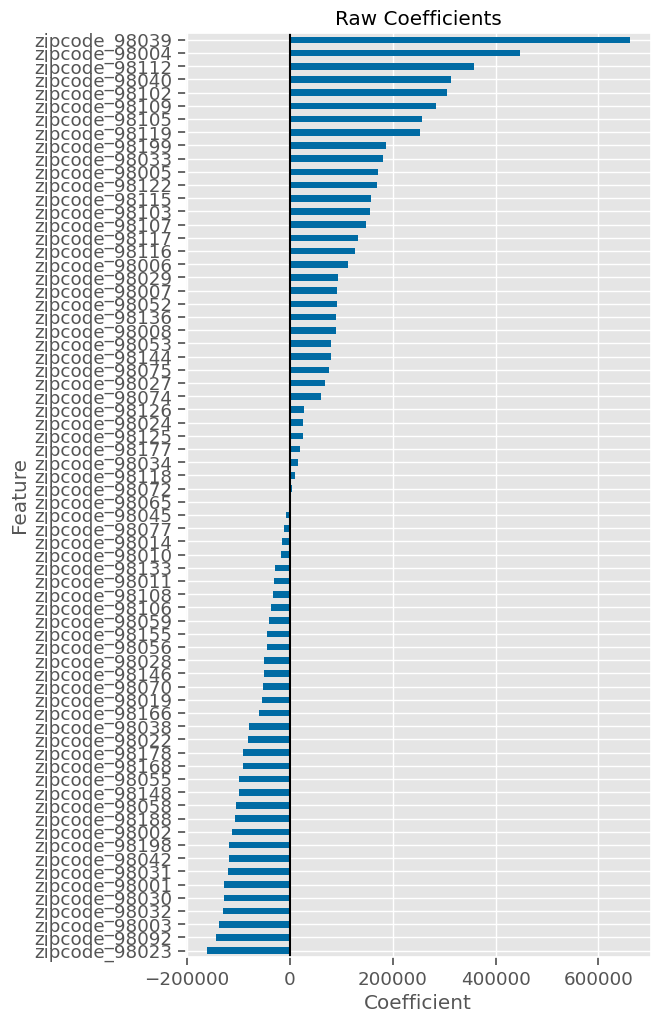

In [54]:
fig_scaled_zips =lp.plot_coeffs(result_cln_scaled, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

### Scaled Numeric - with Constant

In [55]:
X_train_scaled_df_cln_cnst.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean   2.269522e-16  1.904777e-16 -1.043575e-16 -2.064353e-17 -7.193574e-17   
std    1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min   -2.737005e+00 -2.222884e+00 -2.137715e+00 -8.144297e-01 -8.951943e-01   
25%   -3.803916e-01 -7.775766e-01 -7.457843e-01 -4.220039e-01 -8.951943e-01   
50%   -3.803916e-01 -5.492292e-02 -1.511730e-01 -2.139657e-01 -8.951943e-01   
75%    7.979150e-01  6.677308e-01  6.191189e-01  7.211733e-03  9.620640e-01   
max    3.154528e+00  3.197019e+00  3.781370e+00  1.115929e+01  2.819322e+00   

       waterfront          view     condition         grade    sqft_above  \
count     14026.0  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean          0.0  2.127677e-17 -6.028418e-17  9.574546e-17  1.104366e-16   
std           0.0  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min           0.0 -2.260599e-01 -2.192729e+00 -2.465132e+00 -1.867119e+00   
25%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -7.421956e-01   
50%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -2.648063e-01   
75%           0.0 -2.260599e-01  8.897284e-01  4.520945e-01  5.655277e-01   
max           0.0  4.830905e+00  2.430957e+00  3.369321e+00  3.616882e+00   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   1.402600e+04  1.402600e+04       14026.0  1.402600e+04  1.402600e+04   
mean    8.004118e-17 -3.185436e-15           0.0  2.031273e-14 -2.339431e-14   
std     1.000036e+00  1.000036e+00           0.0  1.000036e+00  1.000036e+00   
min    -6.561916e-01 -2.473983e+00           0.0 -2.741890e+00 -2.188505e+00   
25%    -6.561916e-01 -6.459327e-01           0.0 -6.582541e-01 -8.440149e-01   
50%    -6.561916e-01  1.128806e-01           0.0  8.054811e-02 -1.134825e-01   
75%     6.352936e-01  8.716940e-01           0.0  8.607518e-01  6.714512e-01   
max     3.502391e+00  1.492541e+00           0.0  1.549587e+00  3.290488e+00   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   1.402600e+04  1.402600e+04   14026.000000   14026.000000   
mean    2.836902e-17  2.380972e-17       0.017396       0.010409   
std     1.000036e+00  1.000036e+00       0.130747       0.101497   
min    -2.419371e+00 -9.527262e-01       0.000000       0.000000   
25%    -7.377196e-01 -4.587032e-01       0.000000       0.000000   
50%    -1.882691e-01 -1.811282e-01       0.000000       0.000000   
75%     5.776316e-01  6.491574e-02       0.000000       0.000000   
max     3.541334e+00  9.603089e+00       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.014758       0.011621       0.008056       0.020533   
std         0.120588       0.107178       0.089399       0.141821   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.007130       0.013404       0.003993       0.009411   
std         0.084139       0.115000       0.063063       0.096557   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98014  zipco

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     750.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:08:08   Log-Likelihood:            -1.8054e+05
No. Observations:               14026   AIC:                         3.613e+05
Df Residuals:                   13931   BIC:                         3.620e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms        -4518.5557   1064.774     -4.244      0.000   -6605.657   -2431.455
bathrooms        1.124e+04   1430.271      7.858      0.000    8435.308     1.4e+04
sqft_living      5.031e+04    953.479     52.767      0.000    4.84e+04    5.22e+04
sqft_lot         1.286e+04   1379.432      9.320      0.000    1.02e+04    1.56e+04
floors          -1.311e+04   1291.828    -10.150      0.000   -1.56e+04   -1.06e+04
waterfront      -1.952e-10   8.11e-11     -2.408      0.016   -3.54e-10   -3.63e-11
view             1.427e+04    843.365     16.918      0.000    1.26e+04    1.59e+04
condition        1.664e+04    929.982     17.894      0.000    1.48e+04    1.85e+04
grade            5.036e+04   1452.579     34.669      0.000    4.75e+04    5.32e+04
sqft_above       5.024e+04    973.141     51.627      0.000    4.83e+04    5.21e+04
sqft_basement    3876.1885    906.183      4.277      0.000    2099.948    5652.429
yr_built         -1.42e+04   1433.314     -9.910      0.000    -1.7e+04   -1.14e+04
yr_renovated     1.332e-09   1.17e-10     11.390      0.000     1.1e-09    1.56e-09
lat              1.689e+04   6861.063      2.462      0.014    3445.645    3.03e+04
long            -1.397e+04   5971.676     -2.340      0.019   -2.57e+04   -2269.424
sqft_living15    1.416e+04   1436.795      9.857      0.000    1.13e+04     1.7e+04
sqft_lot15      -6822.1658   1458.273     -4.678      0.000   -9680.577   -3963.755
zipcode_98001    -1.62e+05    1.4e+04    -11.540      0.000    -1.9e+05   -1.34e+05
zipcode_98002   -1.461e+05   1.43e+04    -10.210      0.000   -1.74e+05   -1.18e+05
zipcode_98003   -1.706e+05   1.46e+04    -11.655      0.000   -1.99e+05   -1.42e+05
zipcode_98004    4.135e+05   8079.817     51.183      0.000    3.98e+05    4.29e+05
zipcode_98005     1.39e+05   9624.451     14.442      0.000     1.2e+05    1.58e+05
zipcode_98006    8.056e+04   6450.630     12.489      0.000    6.79e+04    9.32e+04
zipcode_98007    5.913e+04   1.05e+04      5.642      0.000    3.86e+04    7.97e+04
zipcode_98008    5.572e+04   8956.473      6.221      0.000    3.82e+04    7.33e+04
zipcode_98010   -5.052e+04   1.83e+04     -2.755      0.006   -8.65e+04   -1.46e+04
zipcode_98011   -6.418e+04   1.29e+04     -4.987      0.000   -8.94e+04    -3.9e+04
zipcode_98014   -4.817e+04   2.09e+04     -2.305      0.021   -8.91e+04   -7203.625
zipcode_98019   -8.797e+04   1.77e+04     -4.964      0.000   -1.23e+05   -5.32e+04
zipcode_98022   -1.153e+05   2.05e+04     -5.630      0.000   -1.55e+05   -7.52e+04
zipcode_98023   -1.946e+05   1.56e+04    -12.482      0.000   -2.25e+05   -1.64e+05
zipcode_98024   -8008.9371   2.14e+04     -0.374      0.709      -5e+04     3.4e+04
zipcode_98027    3.463e+04   9548.885      3.627      0.000    1.59e+04    5.33e+04
zipcode_98028   -8.324e+04   1.17e+04     -7.092      0.000

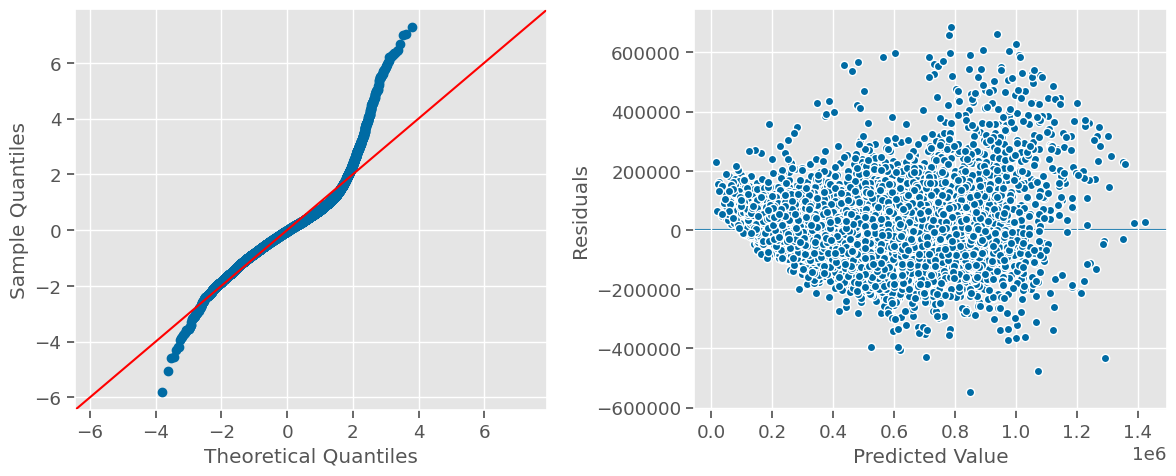

In [56]:
## instantiate an OLS model WITH the training data.
model_cln_scaled_cnst = sm.OLS(y_train_cln, X_train_scaled_df_cln_cnst)

## Fit the model and view the summary
result_cln_scaled_cnst = model_cln_scaled_cnst.fit()
lp.evaluate_ols(result_cln_scaled_cnst,X_train_scaled_df_cln_cnst, y_train_cln)

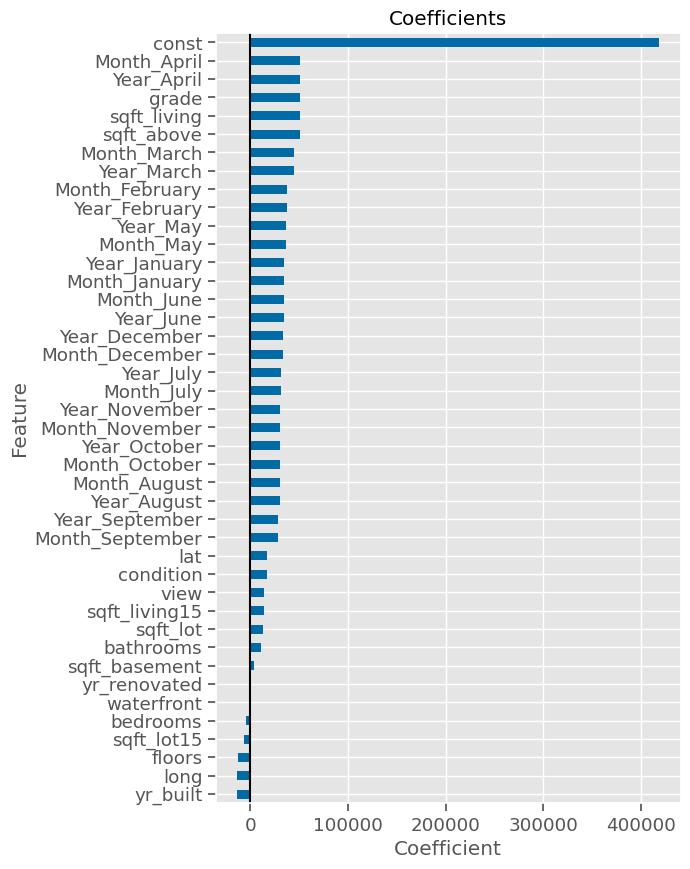

In [57]:
fig_scaled =lp.plot_coeffs(result_cln_scaled_cnst,ohe_cols,include_const=True)

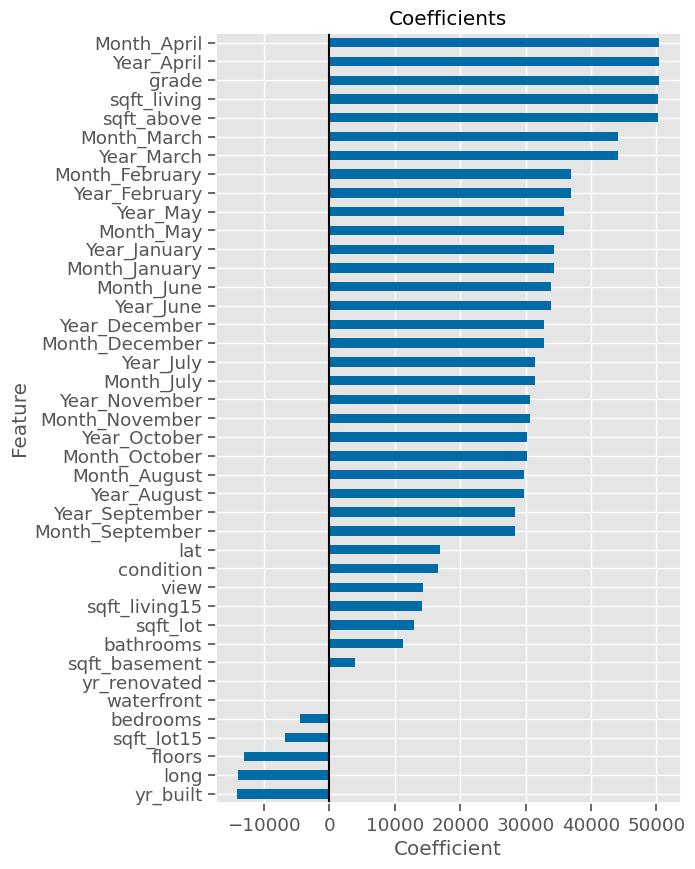

In [58]:
fig_scaled =lp.plot_coeffs(result_cln_scaled_cnst,ohe_cols,include_const=False)

## Sklearn LinearRegression

> Pick 1 of the statsmodels models above to remake in sklearn for model explanations

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
## Making new var name sfor sklearn - update these to change model
ols_results = result_scaled_cnst
# lp.evaluate_ols(ols_results,X_tr,y_tr)
X_tr = X_train_scaled_df_cnst
X_te = X_test_scaled_df_cnst
y_tr = y_train
y_te = y_test

## If const in orig df, 
fit_intercept = 'const' in X_tr.columns

if fit_intercept==True:
    X_tr = X_tr.drop(columns='const')
    X_te = X_te.drop(columns='const')
fit_intercept

True

In [61]:
linreg = LinearRegression(fit_intercept=fit_intercept)
linreg.fit(X_tr, y_tr)
print(f"Train R^2: {format(linreg.score(X_tr,y_tr),'.2f')}")
print(f"Test R^2: {format(linreg.score(X_te,y_te),'.2f')}")
linreg.get_params()

Train R^2: 0.81
Test R^2: 0.80


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [62]:
coeffs = lp.get_coeffs(linreg,X_tr,name='LinReg Coeffs')
coeffs#.head(20)

bedrooms         -2.270927e+04
bathrooms         1.833532e+04
sqft_living      -5.647609e+17
sqft_lot          9.022474e+03
floors           -2.572637e+04
                      ...     
Year_May         -2.415725e+17
Year_November    -2.690380e+17
Year_October     -1.096350e+17
Year_September   -2.195238e+17
const             5.068407e+17
Name: LinReg Coeffs, Length: 112, dtype: float64

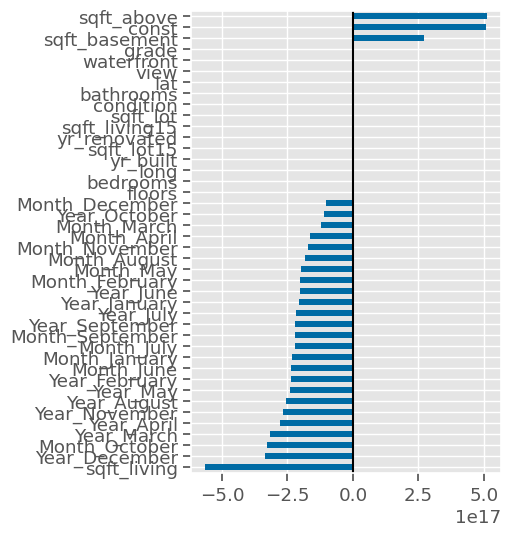

In [63]:
ax = coeffs.drop(ohe_cols).sort_values().plot(kind='barh',figsize=(4,6))
ax.axvline(0,color='black')

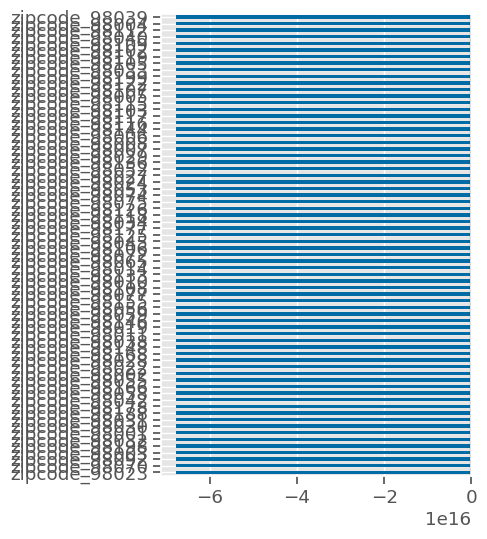

In [64]:
if len(ohe_cols)>1:

    ax = coeffs[ohe_cols].sort_values().plot(kind='barh',figsize=(4,6))
    ax.axvline(0,color='black')

In [65]:
## save 1 df of skelarn vs ols coeffs
compare_coeffs = pd.DataFrame({'OLS':ols_results.params,
                              'LinReg':coeffs}).round(2)
compare_coeffs['Agree?'] = compare_coeffs['OLS']==compare_coeffs['LinReg']

display(compare_coeffs.round(3))
compare_coeffs['Agree?'].value_counts(1)
#compare_coeffs.style.format({'OLS':"{:,.2f}","LinReg":"{:,.2f}"})

OLS        LinReg  Agree?
bedrooms        -22746.66 -2.270927e+04   False
bathrooms        18512.33  1.833532e+04   False
sqft_living      86954.61 -5.647609e+17   False
sqft_lot          8994.73  9.022470e+03   False
floors          -25133.82 -2.572637e+04   False
...                   ...           ...     ...
Year_May         40014.25 -2.415725e+17   False
Year_November    35016.76 -2.690380e+17   False
Year_October     33608.57 -1.096350e+17   False
Year_September   32933.72 -2.195238e+17   False
const           470531.47  5.068407e+17   False

[112 rows x 3 columns]

False    1.0
Name: Agree?, dtype: float64

In [66]:
compare_coeffs[compare_coeffs['Agree?']==True]

Empty DataFrame
Columns: [OLS, LinReg, Agree?]
Index: []

In [67]:
# compare_coeffs[compare_coeffs['Agree?']==False]

In [68]:
compare_coeffs.style.bar()

> ISSUE WITH COEFFICIENTS NOT MATCHING - SEE IF TRUE FOR OTHER DATASETS. 

### Shap

In [69]:
import shap
shap.initjs()

shap.__version__

'0.41.0'

In [70]:
## sampling 200 rows from training data
X_shap = shap.sample(X_tr,nsamples=200,random_state=321)

In [71]:
## Creating explainer from model and getting shap values
explainer = shap.LinearExplainer(linreg,X_shap)
shap_values = explainer(X_shap)
shap_values.shape

(200, 111)

In [72]:
# [i for i in dir(shap_values) if not i.startswith("_")]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


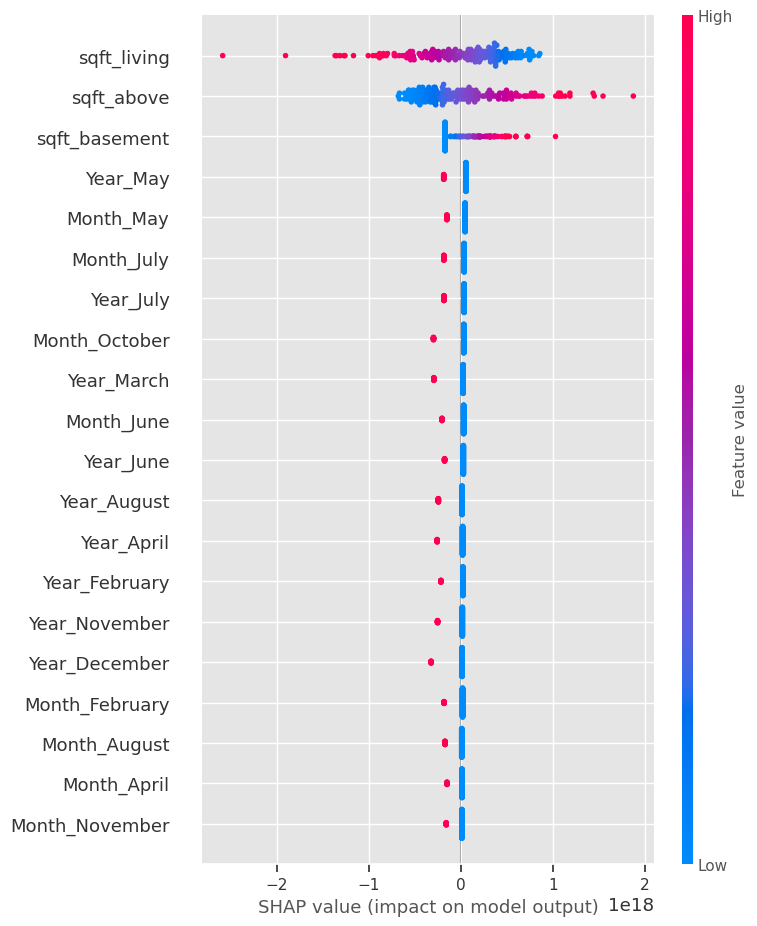

In [73]:
shap.summary_plot(shap_values)

In [74]:
explainer.expected_value

515904.0

In [75]:
shap.force_plot(explainer.expected_value,shap_values= shap_values.values, features=X_shap)       

## RandomForest

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_tr,y_tr)

RandomForestRegressor()

In [77]:
scores = lp.evaluate_regression(rf_reg,X_te, y_te, X_train_df=X_tr, y_train=y_tr,
                            return_scores=True)

TypeError: evaluate_regression() got an unexpected keyword argument 'X_train_df'

In [ ]:
importances = lp.get_importance(rf_reg,X_test_df,top_n=50)

### Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
## Permutation importance takes a fit mode and test data. 
r = permutation_importance(linreg, X_tr, y_tr,
#                            n_repeats=30
                          )
r.keys()

In [ ]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_tr.columns,
                           name = 'permutation importance')
permutation_importances

In [ ]:
permutation_importances.sort_values().tail(20).plot(kind='barh',figsize=(6,12))

In [ ]:
X_shap = shap.sample(X_tr,nsamples=200,random_state=321)

In [ ]:
explainer = shap.TreeExplainer(rf_reg,X_shap)
shap_values = explainer(X_shap)

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.force_plot(explainer.expected_value,shap_values= shap_values.values, features=X_shap)       